# What's it take to be a Survivor?

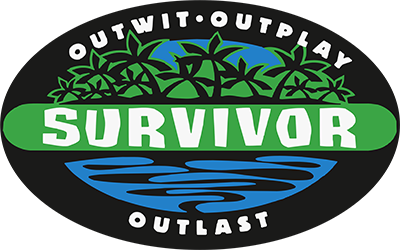

importing all of your important packages first...

In [1]:
import requests
from bs4 import BeautifulSoup as BS
from IPython.core.display import HTML
import pandas as pd
from datetime import datetime
import io
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

set the theme...

In [2]:
colors = ['#3ba84f', '#2381ca', '#1b1e1c', '#757474', '#eef0ee']

In [3]:
all_szn_URL = 'https://en.wikipedia.org/wiki/Survivor_(American_TV_series)'

response = requests.get(all_szn_URL)

In [4]:
type(response)

requests.models.Response

check it out...

In [5]:
response.status_code

200

# nice :)

In [6]:
soup = BS(response.text)

In [7]:
soup.find('title').text

'Survivor (American TV series) - Wikipedia'

In [8]:
soup.find('table', attrs={'class' : 'wikitable'})

<table class="wikitable sortable" style="font-size:95%; text-align:center">
<caption>List of <i>Survivor</i> seasons
</caption>
<tbody><tr>
<th style="width:2%;">Season
</th>
<th style="width:15%;">Subtitle
</th>
<th style="width:20%;">Location
</th>
<th style="width:20%;">Original tribes
</th>
<th style="width:15%;">Winner
</th>
<th colspan="2" style="width:20%">Runner(s)-up
</th>
<th style="white-space:nowrap">Final vote
</th></tr>
<tr>
<th><a href="/wiki/Survivor:_Borneo" title="Survivor: Borneo">1</a>
</th>
<td><i>Borneo</i><sup class="reference" id="cite_ref-12"><a href="#cite_note-12">[c]</a></sup></td>
<td><a href="/wiki/Tiga_Island,_Malaysia" title="Tiga Island, Malaysia">Pulau Tiga</a>, <a href="/wiki/Sabah" title="Sabah">Sabah</a>, Malaysia</td>
<td rowspan="4">Two tribes of eight new players</td>
<td><a href="/wiki/Richard_Hatch_(Survivor_contestant)" title="Richard Hatch (Survivor contestant)">Richard Hatch</a></td>
<td colspan="2">Kelly Wiglesworth</td>
<td rowspan="2">4–3

In [9]:
seasons_df = pd.read_html(str(soup.find('table', attrs={'class' : 'wikitable'})))[0]
seasons_df

,Season,Subtitle,Location,Original tribes,Winner,Runner(s)-up,Runner(s)-up.1,Final vote
0,1,Borneo[c],"Pulau Tiga, Sabah, Malaysia",Two tribes of eight new players,Richard Hatch,Kelly Wiglesworth,Kelly Wiglesworth,4–3
1,2,The Australian Outback,"Herbert River at Goshen Station, Queensland, A...",Two tribes of eight new players,Tina Wesson,Colby Donaldson,Colby Donaldson,4–3
2,3,Africa,"Shaba National Reserve, Kenya[10]",Two tribes of eight new players,Ethan Zohn,Kim Johnson,Kim Johnson,5–2
3,4,Marquesas,"Nuku Hiva, Marquesas Islands, French Polynesia",Two tribes of eight new players,Vecepia Towery,Neleh Dennis,Neleh Dennis,4–3
4,5,Thailand,"Ko Tarutao, Satun Province, Thailand",Two tribes of eight new players; picked by the...,Brian Heidik,Clay Jordan,Clay Jordan,4–3
5,6,The Amazon,"Rio Negro, Amazonas, Brazil",Two tribes of eight new players divided by gender,Jenna Morasca,Matthew Von Ertfelda,Matthew Von Ertfelda,6–1
6,7,Pearl Islands,"Pearl Islands, Panama",Two tribes of eight new players,Sandra Diaz-Twine,Lillian Morris,Lillian Morris,6–1
7,8,All-Stars,"Pearl Islands, Panama",Three tribes of six returning players,Amber Brkich,Rob Mariano,Rob Mariano,4–3
8,9,Vanuatu,"Efate, Shefa, Vanuatu",Two tribes of nine new players divided by gender,Chris Daugherty,Twila Tanner,Twila Tanner,5–2
9,10,Palau,"Koror, Palau",A schoolyard pick of two tribes of nine new pl...,Tom Westman,Katie Gallagher,Katie Gallagher,6–1


# Names

Using data from the Social Security Administration[https://www.ssa.gov/data/] I combine a few years worth of names into a single data frame and remove the duplicate names. This data is used to assume the gender of each contestant in the survisor tables later on as this data wasn't provided in the tables already.

In [10]:
file_paths = ['../names/yob2000.txt', '../names/yob2001.txt', '../names/yob2002.txt', '../names/yob2003.txt', '../names/yob2004.txt', '../names/yob2005.txt', '../names/yob2006.txt', '../names/yob2007.txt', '../names/yob2008.txt', '../names/yob2009.txt', '../names/yob2010.txt']

dfs = []

for file_path in file_paths:
    df = pd.read_csv(file_path, header=None, names=['Name', 'Gender', 'Count'])
    dfs.append(df)

names_df = pd.concat(dfs, ignore_index=True)

names_df = names_df.drop_duplicates(subset='Name')
names_df


,Name,Gender,Count
0,Emily,F,25957
1,Hannah,F,23085
2,Madison,F,19968
3,Ashley,F,17998
4,Sarah,F,17712
...,...,...,...
359414,Zyeire,M,5
359415,Zygmunt,M,5
359419,Zymaire,M,5
359420,Zyonne,M,5


# Noticed that the names + gender function aren't matching very well i.e. Richard is labeled as female in the all seasons table below. That can't be right...

In [57]:
file_paths = ['../names/yob2000.txt', '../names/yob2001.txt', '../names/yob2002.txt', '../names/yob2003.txt', '../names/yob2004.txt', '../names/yob2005.txt', '../names/yob2006.txt', '../names/yob2007.txt', '../names/yob2008.txt', '../names/yob2009.txt', '../names/yob2010.txt']

dfs = []

for file_path in file_paths:
    df = pd.read_csv(file_path, header=None, names=['Name', 'Gender', 'Count'])
    dfs.append(df)

names_df = pd.concat(dfs, ignore_index=True)

names_df = names_df.drop_duplicates(subset='Name')

names_df = names_df.reset_index(drop=True)

names_df

# look for richard and confirm gender assignment, review read csv on txt files, babynames project?

,Name,Gender,Count
0,Emily,F,25957
1,Hannah,F,23085
2,Madison,F,19968
3,Ashley,F,17998
4,Sarah,F,17712
...,...,...,...
57169,Zyeire,M,5
57170,Zygmunt,M,5
57171,Zymaire,M,5
57172,Zyonne,M,5


In [58]:
names_df[names_df['Name'] == 'Richard']

,Name,Gender,Count
9025,Richard,F,11


# All Seasons

In [55]:
seasons_df[['First Name', 'Last Name']] = seasons_df['Winner'].str.split(' ', n=1, expand=True)

# Function to cross-reference name with gender
def get_gender(name):
    match = names_df[names_df['Name'] == name]
    if not match.empty:
        return match.iloc[0]['Gender']
    else:
        return 'Unknown'

# Add the 'Gender' column using the get_gender() function
seasons_df['Gender'] = seasons_df['First Name'].apply(get_gender)

seasons_df

# write function as a loop, maybe revise match iloc

,Season,Subtitle,Location,Original tribes,Winner,Runner(s)-up,Runner(s)-up.1,Final vote,First Name,Last Name,Gender
0,1,Borneo[c],"Pulau Tiga, Sabah, Malaysia",Two tribes of eight new players,Richard Hatch,Kelly Wiglesworth,Kelly Wiglesworth,4–3,Richard,Hatch,F
1,2,The Australian Outback,"Herbert River at Goshen Station, Queensland, A...",Two tribes of eight new players,Tina Wesson,Colby Donaldson,Colby Donaldson,4–3,Tina,Wesson,F
2,3,Africa,"Shaba National Reserve, Kenya[10]",Two tribes of eight new players,Ethan Zohn,Kim Johnson,Kim Johnson,5–2,Ethan,Zohn,F
3,4,Marquesas,"Nuku Hiva, Marquesas Islands, French Polynesia",Two tribes of eight new players,Vecepia Towery,Neleh Dennis,Neleh Dennis,4–3,Vecepia,Towery,Unknown
4,5,Thailand,"Ko Tarutao, Satun Province, Thailand",Two tribes of eight new players; picked by the...,Brian Heidik,Clay Jordan,Clay Jordan,4–3,Brian,Heidik,F
5,6,The Amazon,"Rio Negro, Amazonas, Brazil",Two tribes of eight new players divided by gender,Jenna Morasca,Matthew Von Ertfelda,Matthew Von Ertfelda,6–1,Jenna,Morasca,F
6,7,Pearl Islands,"Pearl Islands, Panama",Two tribes of eight new players,Sandra Diaz-Twine,Lillian Morris,Lillian Morris,6–1,Sandra,Diaz-Twine,F
7,8,All-Stars,"Pearl Islands, Panama",Three tribes of six returning players,Amber Brkich,Rob Mariano,Rob Mariano,4–3,Amber,Brkich,F
8,9,Vanuatu,"Efate, Shefa, Vanuatu",Two tribes of nine new players divided by gender,Chris Daugherty,Twila Tanner,Twila Tanner,5–2,Chris,Daugherty,F
9,10,Palau,"Koror, Palau",A schoolyard pick of two tribes of nine new pl...,Tom Westman,Katie Gallagher,Katie Gallagher,6–1,Tom,Westman,M


In [13]:
# grabbing ratings table on the page
tables = soup.find_all('table', attrs={'class': 'wikitable'})
second_table = tables[2]  

ratings_df = pd.read_html(str(second_table))[0]

ratings_df


Season   Timeslot (ET)[e]               Premiered  \
   Season   Timeslot (ET)[e]                    Date   
0       1  Wednesday 8:00 pm        May 31, 2000[33]   
1       2   Thursday 8:00 pm    January 28, 2001[36]   
2       3   Thursday 8:00 pm    October 11, 2001[39]   
3       4   Thursday 8:00 pm   February 28, 2002[42]   
4       5   Thursday 8:00 pm  September 19, 2002[45]   
5       6   Thursday 8:00 pm   February 13, 2003[48]   
6       7   Thursday 8:00 pm      September 18, 2003   
7       8   Thursday 8:00 pm        February 1, 2004   
8       9   Thursday 8:00 pm  September 16, 2004[54]   
9      10   Thursday 8:00 pm   February 17, 2005[56]   
10     11   Thursday 8:00 pm  September 15, 2005[59]   
11     12   Thursday 8:00 pm    February 2, 2006[62]   
12     13   Thursday 8:00 pm  September 14, 2006[64]   
13     14   Thursday 8:00 pm    February 8, 2007[66]   
14     15   Thursday 8:00 pm  September 20, 2007[67]   
15     16   Thursday 8:00 pm    February 7, 2008[69]   
16     17   Thursday 8:00 pm      September 25, 2008   
17     18   Thursday 8:00 pm       February 12, 2009   
18     19   Thursday 8:00 pm  September 17, 2009[74]   
19     20   Thursday 8:00 pm   February 11, 2010[78]   
20     21  Wednesday 8:00 pm  September 15, 2010[81]   
21     22  Wednesday 8:00 pm       February 16, 2011   
22     23  Wednesday 8:00 pm  September 14, 2011[87]   
23     24  Wednesday 8:00 pm       February 15, 2012   
24     25  Wednesday 8:00 pm  September 19, 2012[93]   
25     26  Wednesday 8:00 pm       February 13, 2013   
26     27  Wednesday 8:00 pm      September 18, 2013   
27     28  Wednesday 8:00 pm       February 26, 2014   
28     29  Wednesday 8:00 pm      September 24, 2014   
29     30  Wednesday 8:00 pm       February 25, 2015   
30     31  Wednesday 8:00 pm      September 23, 2015   
31     32  Wednesday 8:00 pm       February 17, 2016   
32     33  Wednesday 8:00 pm      September 21, 2016   
33     34  Wednesday 8:00 pm           March 8, 2017   
34     35  Wednesday 8:00 pm      September 27, 2017   
35     36  Wednesday 8:00 pm       February 28, 2018   
36     37  Wednesday 8:00 pm      September 26, 2018   
37     38  Wednesday 8:00 pm       February 20, 2019   
38     39  Wednesday 8:00 pm      September 25, 2019   
39     40  Wednesday 8:00 pm       February 12, 2020   
40     41  Wednesday 8:00 pm      September 22, 2021   
41     42  Wednesday 8:00 pm           March 9, 2022   
42     43  Wednesday 8:00 pm      September 21, 2022   
43     44  Wednesday 8:00 pm           March 1, 2023   

                                                   Ended  \
   Premiere viewers (in millions)                   Date   
0                           15.51        August 23, 2000   
1                        45.37[f]        May 3, 2001[37]   
2                           23.84   January 10, 2002[40]   
3                           23.19       May 19, 2002[43]   
4                           23.05  December 19, 2002[46]   
5                           23.26       May 11, 2003[49]   
6                           21.50  December 14, 2003[50]   
7                        33.53[f]        May 9, 2004[52]   
8                           20.06  December 12, 2004[55]   
9                           23.66       May 15, 2005[57]   
10                          18.41  December 11, 2005[60]   
11                          19.20           May 14, 2006   
12                          18.00      December 17, 2006   
13                          16.68           May 13, 2007   
14                          15.35      December 16, 2007   
15                          14.02           May 11, 2008   
16                      13.05[70]      December 14, 2008   
17                      13.63[72]           May 17, 2009   
18                      11.66[75]      December 20, 2009   
19                      14.15[79]           May 16, 2010   
20                      12.23[82]      December 19, 2010   
21                      11.17[85]           Ma

# Creating empty lists for overall contestants, challenge winners, & eliminations

In [14]:
all_contestants = []
all_challenge_winners_eliminations = []

# Season 1

In [15]:
szn_1_URL = 'https://en.wikipedia.org/wiki/Survivor:_Borneo'

response1 = requests.get(szn_1_URL)
response1.status_code

200

In [16]:
soup1 = BS(response1.text)
soup1.find('table', attrs={'class' : 'wikitable'})

<table class="wikitable sortable" style="margin:auto; text-align:center">
<caption>List of <i>Survivor: Borneo</i> contestants
</caption>
<tbody><tr>
<th rowspan="2" scope="col">Contestant
</th>
<th rowspan="2" scope="col">Age
</th>
<th class="unsortable" rowspan="2" scope="col">From
</th>
<th colspan="2" scope="colgroup">Tribe
</th>
<th colspan="2" scope="colgroup">Finish
</th></tr>
<tr>
<th scope="col">Original
</th>
<th class="unsortable" scope="col">Merged
</th>
<th class="unsortable" scope="col">Placement
</th>
<th class="unsortable" scope="col">Day
</th></tr>
<tr>
<th scope="row" style="text-align:left"><span data-sort-value="Christopher, Sonja"><span class="vcard"><span class="fn">Sonja Christopher</span></span></span>
</th>
<td>63
</td>
<td><a href="/wiki/Walnut_Creek,_California" title="Walnut Creek, California">Walnut Creek,<br/>California</a>
</td>
<td style="background:#ff6600; color:white;">Tagi
</td>
<td bgcolor="darkgray" rowspan="6">
</td>
<td>1st voted out
</td>
<td>Da

# IDEA add map of survivor locations and hometowns

In [17]:
# getting contestants table and appending a column to classify the season
contestants_df_szn1 = pd.read_html(str(soup1.find('table', attrs={'class' : 'wikitable'})))[0]
contestants_df_szn1['Season'] = 'Season 1'
contestants_df_szn1

Contestant Age                       From    Tribe           \
           Contestant Age                       From Original   Merged   
0   Sonja Christopher  63   Walnut Creek, California     Tagi      NaN   
1       B.B. Andersen  64      Mission Hills, Kansas   Pagong      NaN   
2     Stacey Stillman  27  San Francisco, California     Tagi      NaN   
3         Ramona Gray  29         Edison, New Jersey   Pagong      NaN   
4           Dirk Been  23    Spring Green, Wisconsin     Tagi      NaN   
5           Joel Klug  27         Sherwood, Arkansas   Pagong      NaN   
6      Gretchen Cordy  38     Clarksville, Tennessee   Pagong  Rattana   
7           Greg Buis  24        Gold Hill, Colorado   Pagong  Rattana   
8         Jenna Lewis  22    Franklin, New Hampshire   Pagong  Rattana   
9    Gervase Peterson  30    Willingboro, New Jersey   Pagong  Rattana   
10    Colleen Haskell  23       Miami Beach, Florida   Pagong  Rattana   
11       Sean Kenniff  30      Carle Place, New York     Tagi  Rattana   
12         Susan Hawk  38         Palmyra, Wisconsin     Tagi  Rattana   
13        Rudy Boesch  72   Virginia Beach, Virginia     Tagi  Rattana   
14  Kelly Wiglesworth  22      Kernville, California     Tagi  Rattana   
15      Richard Hatch  39      Newport, Rhode Island     Tagi  Rattana   

                            Finish            Season  
                         Placement     Day            
0                    1st voted out   Day 3  Season 1  
1                    2nd voted out   Day 6  Season 1  
2                    3rd voted out   Day 9  Season 1  
3                    4th voted out  Day 12  Season 1  
4                    5th voted out  Day 15  Season 1  
5                    6th voted out  Day 18  Season 1  
6                    7th voted out  Day 21  Season 1  
7    8th voted out 1st jury member  Day 24  Season 1  
8    9th voted out 2nd jury member  Day 27  Season 1  
9   10th voted out 3rd jury member  Day 30  Season 1  
10  11th voted out 4th jury member  Day 33  Season 1  
11  12th voted out 5th jury member  Day 36  Season 1  
12  13th voted out 6th jury member  Day 37  Season 1  
13  14th voted out 7th jury member  Day 38  Season 1  
14                       Runner-up  Day 39  Season 1  
15                   Sole Survivor  Day 39  Season 1

In [18]:
contestants_df_szn1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   (Contestant, Contestant)  16 non-null     object
 1   (Age, Age)                16 non-null     int64 
 2   (From, From)              16 non-null     object
 3   (Tribe, Original)         16 non-null     object
 4   (Tribe, Merged)           10 non-null     object
 5   (Finish, Placement)       16 non-null     object
 6   (Finish, Day)             16 non-null     object
 7   (Season, )                16 non-null     object
dtypes: int64(1), object(7)
memory usage: 1.1+ KB


In [19]:
#running into issues splitting out the first and last name with multi-index
print(contestants_df_szn1.columns)

MultiIndex([('Contestant', 'Contestant'),
            (       'Age',        'Age'),
            (      'From',       'From'),
            (     'Tribe',   'Original'),
            (     'Tribe',     'Merged'),
            (    'Finish',  'Placement'),
            (    'Finish',        'Day'),
            (    'Season',           '')],
           )


In [20]:
# reset to single index columns
contestants_df_szn1 = contestants_df_szn1.reset_index().droplevel(1, axis=1)

In [21]:
# fixed
print(contestants_df_szn1.columns)

Index(['index', 'Contestant', 'Age', 'From', 'Tribe', 'Tribe', 'Finish',
       'Finish', 'Season'],
      dtype='object')


In [22]:
# splitting out first and last name
contestants_df_szn1[['First Name', 'Last Name']] = contestants_df_szn1['Contestant'].str.split(' ', n=1, expand=True)
contestants_df_szn1

,index,Contestant,Age,From,Tribe,Tribe,Finish,Finish,Season,First Name,Last Name
0,0,Sonja Christopher,63,"Walnut Creek, California",Tagi,NaN,1st voted out,Day 3,Season 1,Sonja,Christopher
1,1,B.B. Andersen,64,"Mission Hills, Kansas",Pagong,NaN,2nd voted out,Day 6,Season 1,B.B.,Andersen
2,2,Stacey Stillman,27,"San Francisco, California",Tagi,NaN,3rd voted out,Day 9,Season 1,Stacey,Stillman
3,3,Ramona Gray,29,"Edison, New Jersey",Pagong,NaN,4th voted out,Day 12,Season 1,Ramona,Gray
4,4,Dirk Been,23,"Spring Green, Wisconsin",Tagi,NaN,5th voted out,Day 15,Season 1,Dirk,Been
5,5,Joel Klug,27,"Sherwood, Arkansas",Pagong,NaN,6th voted out,Day 18,Season 1,Joel,Klug
6,6,Gretchen Cordy,38,"Clarksville, Tennessee",Pagong,Rattana,7th voted out,Day 21,Season 1,Gretchen,Cordy
7,7,Greg Buis,24,"Gold Hill, Colorado",Pagong,Rattana,8th voted out 1st jury member,Day 24,Season 1,Greg,Buis
8,8,Jenna Lewis,22,"Franklin, New Hampshire",Pagong,Rattana,9th voted out 2nd jury member,Day 27,Season 1,Jenna,Lewis
9,9,Gervase Peterson,30,"Willingboro, New Jersey",Pagong,Rattana,10th voted out 3rd jury member,Day 30,Season 1,Gervase,Peterson


In [23]:
# Add the 'Gender' column using the get_gender() function
contestants_df_szn1['Gender'] = contestants_df_szn1['First Name'].apply(get_gender)
contestants_df_szn1.columns = ['index', 'Contestant', 'Age', 'From', 'Original Tribe', 'Merged Tribe', 'Placement', 'Finish Day', 'Season', 'First Name', 'Last Name', 'Gender']
all_contestants.append(contestants_df_szn1)

contestants_df_szn1

,index,Contestant,Age,From,Original Tribe,Merged Tribe,Placement,Finish Day,Season,First Name,Last Name,Gender
0,0,Sonja Christopher,63,"Walnut Creek, California",Tagi,NaN,1st voted out,Day 3,Season 1,Sonja,Christopher,Name Gender Count 1501 Sonja F ...
1,1,B.B. Andersen,64,"Mission Hills, Kansas",Pagong,NaN,2nd voted out,Day 6,Season 1,B.B.,Andersen,Unknown
2,2,Stacey Stillman,27,"San Francisco, California",Tagi,NaN,3rd voted out,Day 9,Season 1,Stacey,Stillman,Name Gender Count 682 Stacey F ...
3,3,Ramona Gray,29,"Edison, New Jersey",Pagong,NaN,4th voted out,Day 12,Season 1,Ramona,Gray,Name Gender Count 2100 Ramona F...
4,4,Dirk Been,23,"Spring Green, Wisconsin",Tagi,NaN,5th voted out,Day 15,Season 1,Dirk,Been,Name Gender Count 19026 Dirk M ...
5,5,Joel Klug,27,"Sherwood, Arkansas",Pagong,NaN,6th voted out,Day 18,Season 1,Joel,Klug,Name Gender Count 6964 Joel F 15
6,6,Gretchen Cordy,38,"Clarksville, Tennessee",Pagong,Rattana,7th voted out,Day 21,Season 1,Gretchen,Cordy,Name Gender Count 742 Gretchen ...
7,7,Greg Buis,24,"Gold Hill, Colorado",Pagong,Rattana,8th voted out 1st jury member,Day 24,Season 1,Greg,Buis,Name Gender Count 18489 Greg M ...
8,8,Jenna Lewis,22,"Franklin, New Hampshire",Pagong,Rattana,9th voted out 2nd jury member,Day 27,Season 1,Jenna,Lewis,Name Gender Count 62 Jenna F 5045
9,9,Gervase Peterson,30,"Willingboro, New Jersey",Pagong,Rattana,10th voted out 3rd jury member,Day 30,Season 1,Gervase,Peterson,Unknown


# Season 1 Challenge Winners + Eliminations

In [24]:
# grabbing 2nd table on challenges and winners and appending a column to classify the season
tables = soup1.find_all('table', attrs={'class': 'wikitable'})
second_table = tables[1]  

challenge_winners_eliminations_1 = pd.read_html(str(second_table))[0]

challenge_winners_eliminations_1['Season'] = 'Season 1'
all_challenge_winners_eliminations.append(challenge_winners_eliminations_1)
challenge_winners_eliminations_1

Episode                                             Challenge winner(s)  \
       No.                      Title         Air date              Reward   
0        1            "The Marooning"     May 31, 2000              Pagong   
1        2       "The Generation Gap"     June 7, 2000           Pagong[a]   
2        3           "Quest for Food"    June 14, 2000                Tagi   
3        4    "Too Little, Too Late?"    June 21, 2000                Tagi   
4        5  "Pulling Your Own Weight"    June 28, 2000              Pagong   
5        6            "Udder Revenge"     July 5, 2000              Pagong   
6        7               "The Merger"    July 12, 2000             None[b]   
7        8    "Thy Name Is Duplicity"    July 19, 2000                Greg   
8        9        "Old and New Bonds"    July 26, 2000     Colleen [Jenna]   
9       10    "Crack in the Alliance"   August 2, 2000             Gervase   
10      11           "Long Hard Days"   August 9, 2000      Sean [Richard]   
11      12     "Death of an Alliance"  August 16, 2000               Kelly   
12      13           "The Final Four"  August 23, 2000                None   
13      13           "The Final Four"  August 23, 2000                None   
14      13           "The Final Four"  August 23, 2000                 NaN   
15      14              "The Reunion"  August 23, 2000                 NaN   

            Eliminated              Season  
   Immunity      Tribe    Player            
0    Pagong       Tagi     Sonja  Season 1  
1      Tagi     Pagong      B.B.  Season 1  
2    Pagong       Tagi    Stacey  Season 1  
3      Tagi     Pagong    Ramona  Season 1  
4    Pagong       Tagi      Dirk  Season 1  
5      Tagi     Pagong      Joel  Season 1  
6      Greg    Rattana  Gretchen  Season 1  
7   Gervase    Rattana      Greg  Season 1  
8      Rudy    Rattana     Jenna  Season 1  
9   Richard    Rattana   Gervase  Season 1  
10    Kelly    Rattana   Colleen  Season 1  
11    Kelly    Rattana      Sean  Season 1  
12    Kelly    Rattana     Susan  Season 1  
13    Kelly    Rattana      Rudy  Season 1  
14      NaN        NaN       NaN  Season 1  
15      NaN        NaN       NaN  Season 1

# Season 2

In [25]:
szn_2_URL = 'https://en.wikipedia.org/wiki/Survivor:_The_Australian_Outback'

response2 = requests.get(szn_2_URL)
response2.status_code

200

In [26]:
soup2 = BS(response2.text)
soup2.find('table', attrs={'class' : 'wikitable'})

<table class="wikitable sortable" style="margin:auto; text-align:center">
<caption>List of <i>Survivor: The Australian Outback</i> contestants
</caption>
<tbody><tr>
<th rowspan="2" scope="col">Contestant
</th>
<th rowspan="2" scope="col">Age
</th>
<th class="unsortable" rowspan="2" scope="col">From
</th>
<th colspan="2" scope="colgroup">Tribe
</th>
<th colspan="2">Finish
</th></tr>
<tr>
<th scope="col">Original
</th>
<th class="unsortable" scope="col">Merged
</th>
<th class="unsortable" scope="col">Placement
</th>
<th class="unsortable" scope="col">Day
</th></tr>
<tr>
<th scope="row" style="text-align:left"><span data-sort-value="Eaton, Debb"><span class="vcard"><span class="fn">Debb Eaton</span></span></span>
</th>
<td>45
</td>
<td><a href="/wiki/Milan,_New_Hampshire" title="Milan, New Hampshire">Milan,<br/>New Hampshire</a>
</td>
<td style="background:#0099cc; color:white;">Kucha
</td>
<td rowspan="6" style="background:darkgrey;">
</td>
<td>1st voted out
</td>
<td>Day 3
</td></tr>
<

In [27]:
# getting contestants table and appending a column to classify the season
contestants_df_szn2 = pd.read_html(str(soup2.find('table', attrs={'class' : 'wikitable'})))[0]
contestants_df_szn2['Season'] = 'Season 2'
contestants_df_szn2

Contestant Age                       From    Tribe              \
            Contestant Age                       From Original      Merged   
0           Debb Eaton  45       Milan, New Hampshire    Kucha         NaN   
1          Kel Gleason  32           Fort Hood, Texas   Ogakor         NaN   
2      Maralyn Hershey  51        Wakefield, Virginia   Ogakor         NaN   
3       Mitchell Olson  23     Union City, New Jersey   Ogakor         NaN   
4     Kimmi Kappenberg  27       Ronkonkoma, New York    Kucha         NaN   
5       Michael Skupin  38       White Lake, Michigan    Kucha         NaN   
6          Jeff Varner  34        Manhattan, New York    Kucha  Barramundi   
7       Alicia Calaway  32        Manhattan, New York    Kucha  Barramundi   
8        Jerri Manthey  30    Los Angeles, California   Ogakor  Barramundi   
9           Nick Brown  23     Steilacoom, Washington    Kucha  Barramundi   
10        Amber Brkich  22       Beaver, Pennsylvania   Ogakor  Barramundi   
11      Rodger Bingham  53       Crittenden, Kentucky    Kucha  Barramundi   
12  Elisabeth Filarski  23      Newton, Massachusetts    Kucha  Barramundi   
13         Keith Famie  40  West Bloomfield, Michigan   Ogakor  Barramundi   
14     Colby Donaldson  26              Dallas, Texas   Ogakor  Barramundi   
15         Tina Wesson  40       Knoxville, Tennessee   Ogakor  Barramundi   

                            Finish            Season  
                         Placement     Day            
0                    1st voted out   Day 3  Season 2  
1                    2nd voted out   Day 6  Season 2  
2                    3rd voted out   Day 9  Season 2  
3                    4th voted out  Day 12  Season 2  
4                    5th voted out  Day 15  Season 2  
5              Medically evacuated  Day 17  Season 2  
6                    6th voted out  Day 21  Season 2  
7    7th voted out 1st jury member  Day 24  Season 2  
8    8th voted out 2nd jury member  Day 27  Season 2  
9    9th voted out 3rd jury member  Day 30  Season 2  
10  10th voted out 4th jury member  Day 33  Season 2  
11  11th voted out 5th jury member  Day 36  Season 2  
12  12th voted out 6th jury member  Day 39  Season 2  
13  13th voted out 7th jury member  Day 41  Season 2  
14                       Runner-up  Day 42  Season 2  
15                   Sole Survivor  Day 42  Season 2

In [28]:
contestants_df_szn2 = contestants_df_szn2.reset_index().droplevel(1, axis=1)
print(contestants_df_szn1.columns)

Index(['index', 'Contestant', 'Age', 'From', 'Original Tribe', 'Merged Tribe',
       'Placement', 'Finish Day', 'Season', 'First Name', 'Last Name',
       'Gender'],
      dtype='object')


In [29]:
# splitting out first and last name
contestants_df_szn2[['First Name', 'Last Name']] = contestants_df_szn2['Contestant'].str.split(' ', n=1, expand=True)
contestants_df_szn2

,index,Contestant,Age,From,Tribe,Tribe,Finish,Finish,Season,First Name,Last Name
0,0,Debb Eaton,45,"Milan, New Hampshire",Kucha,NaN,1st voted out,Day 3,Season 2,Debb,Eaton
1,1,Kel Gleason,32,"Fort Hood, Texas",Ogakor,NaN,2nd voted out,Day 6,Season 2,Kel,Gleason
2,2,Maralyn Hershey,51,"Wakefield, Virginia",Ogakor,NaN,3rd voted out,Day 9,Season 2,Maralyn,Hershey
3,3,Mitchell Olson,23,"Union City, New Jersey",Ogakor,NaN,4th voted out,Day 12,Season 2,Mitchell,Olson
4,4,Kimmi Kappenberg,27,"Ronkonkoma, New York",Kucha,NaN,5th voted out,Day 15,Season 2,Kimmi,Kappenberg
5,5,Michael Skupin,38,"White Lake, Michigan",Kucha,NaN,Medically evacuated,Day 17,Season 2,Michael,Skupin
6,6,Jeff Varner,34,"Manhattan, New York",Kucha,Barramundi,6th voted out,Day 21,Season 2,Jeff,Varner
7,7,Alicia Calaway,32,"Manhattan, New York",Kucha,Barramundi,7th voted out 1st jury member,Day 24,Season 2,Alicia,Calaway
8,8,Jerri Manthey,30,"Los Angeles, California",Ogakor,Barramundi,8th voted out 2nd jury member,Day 27,Season 2,Jerri,Manthey
9,9,Nick Brown,23,"Steilacoom, Washington",Kucha,Barramundi,9th voted out 3rd jury member,Day 30,Season 2,Nick,Brown


In [30]:
# Add the 'Gender' column using the get_gender() function and rename columns
contestants_df_szn2['Gender'] = contestants_df_szn2['First Name'].apply(get_gender)
contestants_df_szn2.columns = ['index', 'Contestant', 'Age', 'From', 'Original Tribe', 'Merged Tribe', 'Placement', 'Finish Day', 'Season', 'First Name', 'Last Name', 'Gender']
all_contestants.append(contestants_df_szn2)

contestants_df_szn2

,index,Contestant,Age,From,Original Tribe,Merged Tribe,Placement,Finish Day,Season,First Name,Last Name,Gender
0,0,Debb Eaton,45,"Milan, New Hampshire",Kucha,NaN,1st voted out,Day 3,Season 2,Debb,Eaton,Unknown
1,1,Kel Gleason,32,"Fort Hood, Texas",Ogakor,NaN,2nd voted out,Day 6,Season 2,Kel,Gleason,Name Gender Count 24471 Kel M 7
2,2,Maralyn Hershey,51,"Wakefield, Virginia",Ogakor,NaN,3rd voted out,Day 9,Season 2,Maralyn,Hershey,Name Gender Count 38195 Maralyn ...
3,3,Mitchell Olson,23,"Union City, New Jersey",Ogakor,NaN,4th voted out,Day 12,Season 2,Mitchell,Olson,Name Gender Count 7885 Mitchell ...
4,4,Kimmi Kappenberg,27,"Ronkonkoma, New York",Kucha,NaN,5th voted out,Day 15,Season 2,Kimmi,Kappenberg,Name Gender Count 27925 Kimmi F...
5,5,Michael Skupin,38,"White Lake, Michigan",Kucha,NaN,Medically evacuated,Day 17,Season 2,Michael,Skupin,Name Gender Count 1567 Michael ...
6,6,Jeff Varner,34,"Manhattan, New York",Kucha,Barramundi,6th voted out,Day 21,Season 2,Jeff,Varner,Name Gender Count 18078 Jeff M ...
7,7,Alicia Calaway,32,"Manhattan, New York",Kucha,Barramundi,7th voted out 1st jury member,Day 24,Season 2,Alicia,Calaway,Name Gender Count 120 Alicia F ...
8,8,Jerri Manthey,30,"Los Angeles, California",Ogakor,Barramundi,8th voted out 2nd jury member,Day 27,Season 2,Jerri,Manthey,Name Gender Count 5222 Jerri F ...
9,9,Nick Brown,23,"Steilacoom, Washington",Kucha,Barramundi,9th voted out 3rd jury member,Day 30,Season 2,Nick,Brown,Name Gender Count 17968 Nick M ...


# Season 2 Challenge Winners + Eliminations

In [31]:
# grabbing 2nd table on challenges and winners and appending a column to classify the season
tables2 = soup2.find_all('table', attrs={'class': 'wikitable'})
second_table2 = tables2[1]  

challenge_winners_eliminations2 = pd.read_html(str(second_table2))[0]

challenge_winners_eliminations2['Season'] = 'Season 2'
all_challenge_winners_eliminations.append(challenge_winners_eliminations2)
challenge_winners_eliminations2

Episode                                             Challenge winner(s)  \
       No.                    Title  Original air date              Reward   
0        1               "Stranded"   January 28, 2001              Ogakor   
1        2              "Suspicion"   February 1, 2001              Ogakor   
2        3           "Trust No One"   February 8, 2001              Ogakor   
3        4     "The Killing Fields"  February 15, 2001               Kucha   
4        5    "The Gloves Come Off"  February 22, 2001               Kucha   
5        6          "Trial By Fire"      March 1, 2001               Kucha   
6        7              "The Merge"      March 8, 2001             None[b]   
7        8               "Friends?"     March 14, 2001       Jerri [Amber]   
8        9      "The First 24 Days"     March 21, 2001       Recap Episode   
9       10      "Honeymoon or Not?"     March 29, 2001        Colby, Jerri   
10      11      "Let's Make a Deal"      April 5, 2001    Survivor Auction   
11      12  "No Longer Just a Game"     April 12, 2001               Colby   
12      13       "Enough Is Enough"     April 19, 2001                Tina   
13      14         "The Final Four"     April 26, 2001               Colby   
14      15     "The Most Deserving"        May 3, 2001                None   
15      16            "The Reunion"        May 3, 2001                 NaN   

                      Eliminated                   Season  
         Immunity          Tribe         Player            
0          Ogakor          Kucha           Debb  Season 2  
1           Kucha         Ogakor            Kel  Season 2  
2           Kucha         Ogakor        Maralyn  Season 2  
3           Kucha         Ogakor       Mitchell  Season 2  
4          Ogakor          Kucha          Kimmi  Season 2  
5         None[a]          Kucha        Michael  Season 2  
6           Keith     Barramundi           Jeff  Season 2  
7           Keith     Barramundi         Alicia  Season 2  
8   Recap Episode  Recap Episode  Recap Episode  Season 2  
9            Nick     Barramundi          Jerri  Season 2  
10          Colby     Barramundi           Nick  Season 2  
11          Colby     Barramundi          Amber  Season 2  
12          Colby     Barramundi         Rodger  Season 2  
13          Colby     Barramundi      Elisabeth  Season 2  
14          Colby     Barramundi          Keith  Season 2  
15            NaN            NaN            NaN  Season 2

# Season 3 

In [32]:
# first I get the url and pass it to requests.get
szn_3_URL = 'https://en.wikipedia.org/wiki/Survivor:_Africa'

response3 = requests.get(szn_3_URL)
response3.status_code

# then I convert this to beautiful soup 
soup3 = BS(response3.text)

# then I look for the first table on the page
soup3.find('table', attrs={'class' : 'wikitable'})

# then getting contestants table and appending a column to classify the season
contestants_df_szn3 = pd.read_html(str(soup3.find('table', attrs={'class' : 'wikitable'})))[0]
contestants_df_szn3['Season'] = 'Season 3'

# then fix the funky axis
contestants_df_szn3 = contestants_df_szn3.reset_index().droplevel(1, axis=1)

# splitting out first and last name
contestants_df_szn3[['First Name', 'Last Name']] = contestants_df_szn3['Contestant'].str.split(' ', n=1, expand=True)
contestants_df_szn3

# finally add the 'Gender' column using the get_gender() function
contestants_df_szn3['Gender'] = contestants_df_szn3['First Name'].apply(get_gender)
contestants_df_szn3.columns = ['index', 'Contestant', 'Age', 'From', 'Original Tribe', 'Switched Tribe', 'Merged Tribe', 'Placement', 'Finish Day', 'Season', 'First Name', 'Last Name', 'Gender']
all_contestants.append(contestants_df_szn3)

contestants_df_szn3

,index,Contestant,Age,From,Original Tribe,Switched Tribe,Merged Tribe,Placement,Finish Day,Season,First Name,Last Name,Gender
0,0,Diane Ogden,42,"Lincoln, Nebraska",Boran,NaN,NaN,1st voted out,Day 3,Season 3,Diane,Ogden,Name Gender Count 710 Diane F 326
1,1,Jessie Camacho,26,"Orlando, Florida",Boran,NaN,NaN,2nd voted out,Day 6,Season 3,Jessie,Camacho,Name Gender Count 399 Jessie F ...
2,2,Carl Bilancione,46,"Winter Springs, Florida",Samburu,NaN,NaN,3rd voted out,Day 9,Season 3,Carl,Bilancione,Name Gender Count 17703 Carl M ...
3,3,Linda Spencer,44,"Boston, Massachusetts",Samburu,NaN,NaN,4th voted out,Day 12,Season 3,Linda,Spencer,Name Gender Count 356 Linda F 851
4,4,Silas Gaither,23,"Los Angeles, California",Samburu,Boran,NaN,5th voted out,Day 15,Season 3,Silas,Gaither,Name Gender Count 17864 Silas M...
5,5,Lindsey Richter,26,"Portland, Oregon",Samburu,Samburu,NaN,6th voted out,Day 18,Season 3,Lindsey,Richter,Name Gender Count 102 Lindsey F...
6,6,Clarence Black,24,"Detroit, Michigan",Boran,Boran,Moto Maji,7th voted out,Day 21,Season 3,Clarence,Black,Name Gender Count 17871 Clarence ...
7,7,Kelly Goldsmith,22,"San Diego, California",Boran,Samburu,Moto Maji,8th voted out 1st jury member,Day 24,Season 3,Kelly,Goldsmith,Name Gender Count 110 Kelly F 3076
8,8,Brandon Quinton,25,"Dallas, Texas",Samburu,Samburu,Moto Maji,9th voted out 2nd jury member,Day 27,Season 3,Brandon,Quinton,Name Gender Count 3219 Brandon ...
9,9,Frank Garrison,43,"Odessa, New York",Samburu,Boran,Moto Maji,10th voted out 3rd jury member,Day 30,Season 3,Frank,Garrison,Name Gender Count 17672 Frank M...


# Season 3 Challenge Winners + Eliminations

In [33]:
# grabbing 2nd table on challenges and winners and appending a column to classify the season
tables3 = soup3.find_all('table', attrs={'class': 'wikitable'})
second_table3 = tables3[1]  

challenge_winners_eliminations3 = pd.read_html(str(second_table3))[0]

challenge_winners_eliminations3['Season'] = 'Season 3'
all_challenge_winners_eliminations.append(challenge_winners_eliminations3)
challenge_winners_eliminations3

Episode                                                       \
       No.                             Title  Original air date   
0        1               "Question of Trust"   October 11, 2001   
1        2             "Who's Zooming Whom?"   October 18, 2001   
2        3              "The Gods Are Angry"   October 25, 2001   
3        4         "The Young and Untrusted"   November 1, 2001   
4        5                       "The Twist"   November 8, 2001   
5        6          "I'd Never Do It To You"  November 15, 2001   
6        7  "Will There Be a Feast Tonight?"  November 22, 2001   
7        8               "The First 21 Days"  November 29, 2001   
8        9           "Smoking Out the Snake"   December 6, 2001   
9       10    "Dinner, Movie and a Betrayal"  December 13, 2001   
10      11                   "We Are Family"  December 20, 2001   
11      12               "The Big Adventure"  December 27, 2001   
12      13                   "Truth Be Told"    January 3, 2002   
13      14      "The Final Four: No Regrets"   January 10, 2002   
14      14      "The Final Four: No Regrets"   January 10, 2002   
15      15                     "The Reunion"   January 10, 2002   

   Challenge winner(s)                    Eliminated                   Season  
                Reward       Immunity          Tribe         Player            
0              Samburu        Samburu          Boran          Diane  Season 3  
1              Samburu        Samburu          Boran         Jessie  Season 3  
2                Boran          Boran        Samburu           Carl  Season 3  
3              Samburu          Boran        Samburu          Linda  Season 3  
4                Boran        Samburu          Boran          Silas  Season 3  
5              Samburu          Boran        Samburu        Lindsey  Season 3  
6              None[a]         Teresa      Moto Maji       Clarence  Season 3  
7        Recap Episode  Recap Episode  Recap Episode  Recap Episode  Season 3  
8          Ethan [Lex]          Ethan      Moto Maji          Kelly  Season 3  
9       Brandon, Frank            Lex      Moto Maji        Brandon  Season 3  
10    Survivor Auction            Lex      Moto Maji          Frank  Season 3  
11           Lex [Tom]            Tom      Moto Maji         Kim P.  Season 3  
12                 Lex            Lex      Moto Maji         Teresa  Season 3  
13                None         Kim J.      Moto Maji            Tom  Season 3  
14                None         Kim J.      Moto Maji            Lex  Season 3  
15                 NaN            NaN            NaN            NaN  Season 3

# Season 4

In [34]:
szn_4_URL = 'https://en.wikipedia.org/wiki/Survivor:_Marquesas'

response4 = requests.get(szn_4_URL)
response4.status_code

soup4 = BS(response4.text)

soup4.find('table', attrs={'class' : 'wikitable'})
contestants_df_szn4 = pd.read_html(str(soup4.find('table', attrs={'class' : 'wikitable'})))[0]
contestants_df_szn4['Season'] = 'Season 4'

contestants_df_szn4 = contestants_df_szn4.reset_index().droplevel(1, axis=1)

contestants_df_szn4[['First Name', 'Last Name']] = contestants_df_szn4['Contestant'].str.split(' ', n=1, expand=True)
contestants_df_szn4

contestants_df_szn4['Gender'] = contestants_df_szn4['First Name'].apply(get_gender)
contestants_df_szn4.columns = ['index', 'Contestant', 'Age', 'From', 'Original Tribe', 'Switched Tribe', 'Merged Tribe', 'Placement', 'Finish Day', 'Season', 'First Name', 'Last Name', 'Gender']
all_contestants.append(contestants_df_szn4)

contestants_df_szn4

,index,Contestant,Age,From,Original Tribe,Switched Tribe,Merged Tribe,Placement,Finish Day,Season,First Name,Last Name,Gender
0,0,Peter Harkey,44,"Millis, Massachusetts",Maraamu,NaN,NaN,1st voted out,Day 3,Season 4,Peter,Harkey,Name Gender Count 14548 Peter F...
1,1,Patricia Jackson,49,"Lugoff, South Carolina",Maraamu,NaN,NaN,2nd voted out,Day 6,Season 4,Patricia,Jackson,Name Gender Count 225 Patricia ...
2,2,Hunter Ellis,33,"La Jolla, California",Maraamu,NaN,NaN,3rd voted out,Day 9,Season 4,Hunter,Ellis,Name Gender Count 401 Hunter F ...
3,3,Sarah Jones,24,"Newport Beach, California",Maraamu,Maraamu,NaN,4th voted out,Day 12,Season 4,Sarah,Jones,Name Gender Count 4 Sarah F 17712
4,4,Gabriel Cade,23,"Hollywood, California",Rotu,Rotu,NaN,5th voted out,Day 15,Season 4,Gabriel,Cade,Name Gender Count 781 Gabriel F...
5,5,Gina Crews,28,"Gainesville, Florida",Maraamu,Maraamu,NaN,6th voted out,Day 18,Season 4,Gina,Crews,Name Gender Count 355 Gina F 855
6,6,Rob Mariano,25,"Canton, Massachusetts",Maraamu,Rotu,Soliantu,7th voted out,Day 21,Season 4,Rob,Mariano,Name Gender Count 21267 Rob M 15
7,7,John Carroll,36,"Omaha, Nebraska",Rotu,Rotu,Soliantu,8th voted out 1st jury member,Day 24,Season 4,John,Carroll,Name Gender Count 4466 John F 27
8,8,Zoe Zanidakis,35,"Monhegan, Maine",Rotu,Rotu,Soliantu,9th voted out 2nd jury member,Day 27,Season 4,Zoe,Zanidakis,Name Gender Count 81 Zoe F 3785
9,9,Tammy Leitner,29,"Mesa, Arizona",Rotu,Rotu,Soliantu,10th voted out 3rd jury member,Day 30,Season 4,Tammy,Leitner,Name Gender Count 1085 Tammy F ...


# Season 4 Challenge Winners + Eliminations

In [35]:
# grabbing 2nd table on challenges and winners and appending a column to classify the season
tables4 = soup4.find_all('table', attrs={'class': 'wikitable'})
second_table4 = tables4[1]  

challenge_winners_eliminations4 = pd.read_html(str(second_table4))[0]

challenge_winners_eliminations4['Season'] = 'Season 4'
all_challenge_winners_eliminations.append(challenge_winners_eliminations4)
challenge_winners_eliminations4

Episode                                                       \
       No.                             Title  Original air date   
0        1               "Back to the Beach"  February 28, 2002   
1        2                     "Nacho Momma"      March 7, 2002   
2        3                "No Pain, No Gain"     March 13, 2002   
3        4                 "The Winds Twist"     March 20, 2002   
4        5            "The End of Innocence"     March 28, 2002   
5        6                   "The Underdogs"      April 4, 2002   
6        7                       "True Lies"     April 11, 2002   
7        8                      "Jury's Out"     April 18, 2002   
8        9  "Look Closer: The First 24 Days"     April 24, 2002   
9       10               "Two Peas in a Pod"     April 25, 2002   
10      11                    "The Princess"        May 2, 2002   
11      12              "Marquesan Vacation"        May 9, 2002   
12      13            "A Tale of Two Cities"       May 16, 2002   
13      14               "The Sole Survivor"       May 19, 2002   
14      14               "The Sole Survivor"       May 19, 2002   
15      15                     "The Reunion"       May 19, 2002   

   Challenge winner(s)                    Eliminated                   Season  
                Reward       Immunity          Tribe         Player            
0                 None           Rotu        Maraamu          Peter  Season 4  
1                 Rotu           Rotu        Maraamu       Patricia  Season 4  
2                 Rotu           Rotu        Maraamu         Hunter  Season 4  
3              None[a]           Rotu        Maraamu          Sarah  Season 4  
4              Maraamu        Maraamu           Rotu        Gabriel  Season 4  
5              Maraamu           Rotu        Maraamu           Gina  Season 4  
6              None[b]          Kathy       Soliantu            Rob  Season 4  
7                Kathy          Tammy       Soliantu           John  Season 4  
8        Recap Episode  Recap Episode  Recap Episode  Recap Episode  Season 4  
9        Paschal, Sean          Tammy       Soliantu            Zoe  Season 4  
10     Paschal [Neleh]         Robert       Soliantu          Tammy  Season 4  
11            Kathy[c]        Vecepia       Soliantu         Robert  Season 4  
12                Sean          Kathy       Soliantu           Sean  Season 4  
13                None        Vecepia       Soliantu        Paschal  Season 4  
14                None          Neleh       Soliantu          Kathy  Season 4  
15                 NaN            NaN            NaN            NaN  Season 4

# Season 5

In [36]:
szn_5_URL = 'https://en.wikipedia.org/wiki/Survivor:_Thailand'

response5 = requests.get(szn_5_URL)
response5.status_code
soup5 = BS(response5.text)
soup5.find('table', attrs={'class' : 'wikitable'})

contestants_df_szn5 = pd.read_html(str(soup5.find('table', attrs={'class' : 'wikitable'})))[0]
contestants_df_szn5['Season'] = 'Season 5'

contestants_df_szn5 = contestants_df_szn5.reset_index().droplevel(1, axis=1)

contestants_df_szn5[['First Name', 'Last Name']] = contestants_df_szn5['Contestant'].str.split(' ', n=1, expand=True)
contestants_df_szn5

contestants_df_szn5['Gender'] = contestants_df_szn5['First Name'].apply(get_gender)

contestants_df_szn5.columns = ['index', 'Contestant', 'Age', 'From', 'Original Tribe', 'Merged Tribe', 'Placement', 'Finish Day', 'Season', 'First Name', 'Last Name', 'Gender']
all_contestants.append(contestants_df_szn5)

contestants_df_szn5

,index,Contestant,Age,From,Original Tribe,Merged Tribe,Placement,Finish Day,Season,First Name,Last Name,Gender
0,0,John Raymond,40,"Slidell, Louisiana",Chuay Gahn,NaN,1st voted out,Day 3,Season 5,John,Raymond,Name Gender Count 4466 John F 27
1,1,Tanya Vance,27,"Gray, Tennessee",Chuay Gahn,NaN,2nd voted out,Day 6,Season 5,Tanya,Vance,Name Gender Count 570 Tanya F 455
2,2,Jed Hildebrand,25,"Dallas, Texas",Sook Jai,NaN,3rd voted out,Day 9,Season 5,Jed,Hildebrand,Name Gender Count 18596 Jed M 70
3,3,Ghandia Johnson,33,"Denver, Colorado",Chuay Gahn,NaN,4th voted out,Day 12,Season 5,Ghandia,Johnson,Unknown
4,4,Stephanie Dill,29,"Ozark, Arkansas",Sook Jai,NaN,5th voted out,Day 15,Season 5,Stephanie,Dill,Name Gender Count 39 Stephanie ...
5,5,Robb Zbacnik,23,"Scottsdale, Arizona",Sook Jai,NaN,6th voted out,Day 18,Season 5,Robb,Zbacnik,Name Gender Count 24683 Robb M ...
6,6,Shii Ann Huang,28,"New York, New York",Sook Jai,NaN,7th voted out,Day 21,Season 5,Shii,Ann Huang,Unknown
7,7,Erin Collins,26,"Austin, Texas",Sook Jai,NaN,8th voted out 1st jury member,Day 24,Season 5,Erin,Collins,Name Gender Count 59 Erin F 5184
8,8,Ken Stafford,30,"Brooklyn, New York",Sook Jai,Chuay Jai,9th voted out 2nd jury member,Day 27,Season 5,Ken,Stafford,Name Gender Count 18217 Ken M 123
9,9,Penny Ramsey,27,"Plano, Texas",Sook Jai,Chuay Jai,10th voted out 3rd jury member,Day 30,Season 5,Penny,Ramsey,Name Gender Count 2768 Penny F ...


# Season 5 Challenge Winners + Eliminations

In [37]:
tables5 = soup5.find_all('table', attrs={'class': 'wikitable'})
second_table5 = tables5[1]  

challenge_winners_eliminations5 = pd.read_html(str(second_table5))[0]

challenge_winners_eliminations5['Season'] = 'Season 5'
all_challenge_winners_eliminations.append(challenge_winners_eliminations5)
challenge_winners_eliminations5

Episode                                                        \
       No.                             Title   Original air date   
0        1  "The Importance of Being Eldest"  September 19, 2002   
1        2                "The Great Divide"  September 26, 2002   
2        3                   "Family Values"     October 3, 2002   
3        4                   "Gender Bender"    October 10, 2002   
4        5            "The Ocean's Surprise"    October 17, 2002   
5        6                "The Power of One"    October 24, 2002   
6        7                     "Assumptions"    October 31, 2002   
7        8         "Sleeping with the Enemy"    November 7, 2002   
8        9              "Desperate Measures"   November 14, 2002   
9       10         "While the Cats are Away"   November 21, 2002   
10      11               "The First 30 Days"   November 27, 2002   
11      12   "A Big Surprise... and Another"    December 5, 2002   
12      13           "The Tides are Turning"   December 12, 2002   
13      14       "Slip Through Your Fingers"   December 19, 2002   
14      14       "Slip Through Your Fingers"   December 19, 2002   
15      15                     "The Reunion"   December 19, 2002   

   Challenge winner(s)                    Eliminated                   Season  
                Reward       Immunity          Tribe         Player            
0                 None       Sook Jai     Chuay Gahn           John  Season 5  
1             Sook Jai       Sook Jai     Chuay Gahn          Tanya  Season 5  
2           Chuay Gahn     Chuay Gahn       Sook Jai            Jed  Season 5  
3             Sook Jai       Sook Jai     Chuay Gahn        Ghandia  Season 5  
4     Survivor Auction     Chuay Gahn       Sook Jai      Stephanie  Season 5  
5             Sook Jai     Chuay Gahn       Sook Jai           Robb  Season 5  
6                 None     Chuay Gahn       Sook Jai       Shii Ann  Season 5  
7                 None     Chuay Gahn       Sook Jai           Erin  Season 5  
8                Brian           Clay      Chuay Jai            Ken  Season 5  
9         Brian [Clay]          Helen      Chuay Jai          Penny  Season 5  
10       Recap Episode  Recap Episode  Recap Episode  Recap Episode  Season 5  
11            Helen[a]         Ted[b]      Chuay Jai           Jake  Season 5  
12         Ted [Helen]          Brian      Chuay Jai            Ted  Season 5  
13                None          Brian      Chuay Jai          Helen  Season 5  
14                None          Brian      Chuay Jai            Jan  Season 5  
15                 NaN            NaN            NaN            NaN  Season 5

# Season 6

In [38]:
szn_6_URL = 'https://en.wikipedia.org/wiki/Survivor:_The_Amazon'

response6 = requests.get(szn_6_URL)
response6.status_code
soup6 = BS(response6.text)
soup6.find('table', attrs={'class' : 'wikitable'})
contestants_df_szn6 = pd.read_html(str(soup6.find('table', attrs={'class' : 'wikitable'})))[0]
contestants_df_szn6['Season'] = 'Season 6'

contestants_df_szn6 = contestants_df_szn6.reset_index().droplevel(1, axis=1)

contestants_df_szn6[['First Name', 'Last Name']] = contestants_df_szn6['Contestant'].str.split(' ', n=1, expand=True)
contestants_df_szn6

contestants_df_szn6['Gender'] = contestants_df_szn6['First Name'].apply(get_gender)
contestants_df_szn6.columns = ['index', 'Contestant', 'Age', 'From', 'Original Tribe', 'Switched Tribe', 'Merged Tribe', 'Placement', 'Finish Day', 'Season', 'First Name', 'Last Name', 'Gender']
all_contestants.append(contestants_df_szn6)

contestants_df_szn6

,index,Contestant,Age,From,Original Tribe,Switched Tribe,Merged Tribe,Placement,Finish Day,Season,First Name,Last Name,Gender
0,0,Ryan Aiken,23,"Ellicott City, Maryland",Tambaqui,NaN,NaN,1st voted out,Day 3,Season 6,Ryan,Aiken,Name Gender Count 580 Ryan F 448
1,1,Janet Koth,46,"Manchester, Missouri",Jaburu,NaN,NaN,2nd voted out,Day 6,Season 6,Janet,Koth,Name Gender Count 411 Janet F 686
2,2,Daniel Lue,26,"Houston, Texas",Tambaqui,NaN,NaN,3rd voted out,Day 9,Season 6,Daniel,Lue,Name Gender Count 2433 Daniel F...
3,3,JoAnna Ward,31,"Orangeburg, South Carolina",Jaburu,NaN,NaN,4th voted out,Day 12,Season 6,JoAnna,Ward,Unknown
4,4,Jeanne Hebert,40,"North Attleborough, Massachusetts",Jaburu,Tambaqui,NaN,5th voted out,Day 15,Season 6,Jeanne,Hebert,Name Gender Count 2132 Jeanne F...
5,5,Shawna Mitchell,23,"Los Angeles, California",Jaburu,Jaburu,NaN,6th voted out,Day 18,Season 6,Shawna,Mitchell,Name Gender Count 691 Shawna F ...
6,6,Roger Sexton,56,"Valencia, California",Tambaqui,Tambaqui,Jacaré,7th voted out,Day 21,Season 6,Roger,Sexton,Name Gender Count 17737 Roger M...
7,7,Dave Johnson,23,"Pasadena, California",Tambaqui,Tambaqui,Jacaré,8th voted out 1st jury member,Day 24,Season 6,Dave,Johnson,Name Gender Count 18359 Dave M ...
8,8,Deena Bennett,35,"Riverside, California",Jaburu,Jaburu,Jacaré,9th voted out 2nd jury member,Day 27,Season 6,Deena,Bennett,Name Gender Count 2177 Deena F ...
9,9,Alex Bell,32,"Los Angeles, California",Tambaqui,Jaburu,Jacaré,10th voted out 3rd jury member,Day 30,Season 6,Alex,Bell,Name Gender Count 915 Alex F 238


# Season 6 Challenge Winners + Eliminations

In [39]:
tables6 = soup6.find_all('table', attrs={'class': 'wikitable'})
second_table6 = tables6[1]  

challenge_winners_eliminations6 = pd.read_html(str(second_table6))[0]

challenge_winners_eliminations6['Season'] = 'Season 6'
all_challenge_winners_eliminations.append(challenge_winners_eliminations6)
challenge_winners_eliminations6

Episode                                                    \
       No.                          Title  Original air date   
0        1               "Boys vs. Girls"  February 13, 2003   
1        2                       "Storms"  February 20, 2003   
2        3                   "Girl Power"  February 27, 2003   
3        4                      "Trapped"      March 6, 2003   
4        5               "Pick-up Sticks"     March 13, 2003   
5        6      "More Than Meats the Eye"     March 19, 2003   
6        7            "Girls Gone Wilder"     March 26, 2003   
7        8      "Sleeping With the Enemy"      April 3, 2003   
8        9                    "The Chain"     April 10, 2003   
9       10                 "Amazon Redux"     April 17, 2013   
10      11                      "Q and A"     April 24, 2003   
11      12                  "Sour Grapes"        May 1, 2003   
12      13          "The Amazon Heats Up"        May 8, 2003   
13      14  "...And Then There Were Four"       May 11, 2003   
14      14  "...And Then There Were Four"       May 11, 2003   
15      15                  "The Reunion"       May 11, 2003   

                            Challenge winner(s)                    \
                                         Reward          Immunity   
0                                          None            Jaburu   
1                                        Jaburu          Tambaqui   
2                                        Jaburu            Jaburu   
3                                      Tambaqui          Tambaqui   
4                                       None[a]            Jaburu   
5                                      Tambaqui          Tambaqui   
6                                       None[b]             Deena   
7                                  Dave [Deena]             Jenna   
8                                  Alex [Jenna]           Matthew   
9                                 Recap Episode     Recap Episode   
10                             Survivor Auction               Rob   
11  Matthew [Butch, Christy, Heidi, Jenna, Rob]  Jenna (Heidi)[c]   
12                                Matthew [Rob]           Matthew   
13                                         None             Jenna   
14                                         None             Jenna   
15                                          NaN               NaN   

       Eliminated                   Season  
            Tribe         Player            
0        Tambaqui           Ryan  Season 6  
1          Jaburu          Janet  Season 6  
2        Tambaqui         Daniel  Season 6  
3          Jaburu         JoAnna  Season 6  
4        Tambaqui         Jeanne  Season 6  
5          Jaburu         Shawna  Season 6  
6          Jacaré          Roger  Season 6  
7          Jacaré           Dave  Season 6  
8          Jacaré          Deena  Season 6  
9   Recap Episode  Recap Episode  Season 6  
10         Jacaré           Alex  Season 6  
11         Jacaré        Christy  Season 6  
12         Jacaré          Heidi  Season 6  
13         Jacaré          Butch  Season 6  
14         Jacaré            Rob  Season 6  
15            NaN            NaN  Season 6

# Season 7

In [40]:
szn_7_URL = 'https://en.wikipedia.org/wiki/Survivor:_Pearl_Islands'

response7 = requests.get(szn_7_URL)
response7.status_code
soup7 = BS(response7.text)
soup7.find('table', attrs={'class' : 'wikitable'})
contestants_df_szn7 = pd.read_html(str(soup7.find('table', attrs={'class' : 'wikitable'})))[0]
contestants_df_szn7['Season'] = 'Season 7'

contestants_df_szn7 = contestants_df_szn7.reset_index().droplevel(1, axis=1)

contestants_df_szn7[['First Name', 'Last Name']] = contestants_df_szn7['Contestant'].str.split(' ', n=1, expand=True)
contestants_df_szn7

contestants_df_szn7['Gender'] = contestants_df_szn7['First Name'].apply(get_gender)
contestants_df_szn7.columns = ['index', 'Contestant', 'Age', 'From', 'Original Tribe', 'Switched Tribe', 'Merged Tribe', 'Placement', 'Finish Day', 'Season', 'First Name', 'Last Name', 'Gender']
all_contestants.append(contestants_df_szn7)

contestants_df_szn7

,index,Contestant,Age,From,Original Tribe,Switched Tribe,Merged Tribe,Placement,Finish Day,Season,First Name,Last Name,Gender
0,0,Nicole Delma,24,"Hermosa Beach, California",Morgan,Outcasts,NaN,1st voted out,Day 3,Season 7,Nicole,Delma,Name Gender Count 30 Nicole F 8562
1,1,Ryan Shoulders,23,"Clarksville, Tennessee",Morgan,Outcasts,NaN,2nd voted out,Day 6,Season 7,Ryan,Shoulders,Name Gender Count 580 Ryan F 448
2,2,Lillian Morris (Returned to game),Lillian Morris (Returned to game),Lillian Morris (Returned to game),Morgan,Outcasts,NaN,3rd voted out[a],Day 9,Season 7,Lillian,Morris (Returned to game),Name Gender Count 128 Lillian F...
3,3,Burton Roberts (Returned to game),Burton Roberts (Returned to game),Burton Roberts (Returned to game),Drake,Outcasts,NaN,4th voted out[a],Day 12,Season 7,Burton,Roberts (Returned to game),Name Gender Count 20268 Burton ...
4,4,Michelle Tesauro,22,"Washington, D.C.",Drake,Outcasts,NaN,5th voted out,Day 15,Season 7,Michelle,Tesauro,Name Gender Count 51 Michelle F...
5,5,Trish Dunn,42,"Annapolis, Maryland",Drake,Outcasts,NaN,6th voted out,Day 18,Season 7,Trish,Dunn,Name Gender Count 6463 Trish F ...
6,6,Shawn Cohen,28,"Hollywood, California",Drake,NaN,NaN,7th voted out,Day 19,Season 7,Shawn,Cohen,Name Gender Count 2420 Shawn F ...
7,7,Osten Taylor,27,"Boston, Massachusetts",Morgan,NaN,NaN,Quit,Day 19,Season 7,Osten,Taylor,Name Gender Count 39322 Osten M...
8,8,Andrew Savage,39,"Chicago, Illinois",Morgan,NaN,Balboa,8th voted out,Day 21,Season 7,Andrew,Savage,Name Gender Count 3070 Andrew F...
9,9,Ryan Opray,30,"Los Gatos, California",Morgan,NaN,Balboa,9th voted out 1st jury member,Day 24,Season 7,Ryan,Opray,Name Gender Count 580 Ryan F 448


# Season 7 Challenge Winners + Eliminations

In [41]:
tables7 = soup7.find_all('table', attrs={'class': 'wikitable'})
second_table7 = tables7[1]  

challenge_winners_eliminations7 = pd.read_html(str(second_table7))[0]

challenge_winners_eliminations7['Season'] = 'Season 7'
all_challenge_winners_eliminations.append(challenge_winners_eliminations7)
challenge_winners_eliminations7

Episode                                                         \
       No.                              Title   Original air date   
0        1               "Beg, Barter, Steal"  September 18, 2003   
1        2           "To Quit or Not to Quit"  September 25, 2003   
2        3  "United We Stand, Divided We...?"     October 2, 2003   
3        4   "Pick a Castaway...Any Castaway"     October 9, 2003   
4        4   "Pick a Castaway...Any Castaway"     October 9, 2003   
5        5                  "Everyone's Hero"    October 16, 2003   
6        6                  "Me and My Snake"    October 23, 2003   
7        7             "What the...?, Part 1"    October 30, 2003   
8        7             "What the...?, Part 1"    October 30, 2003   
9        8             "What the...?, Part 2"    November 6, 2003   
10       8             "What the...?, Part 2"    November 6, 2003   
11       8             "What the...?, Part 2"    November 6, 2003   
12       9       "Shocking! Simply Shocking!"   November 13, 2003   
13      10             "Swimming With Sharks"   November 20, 2003   
14      11                    "The Great Lie"   November 26, 2003   
15      12    "Would You Be My Brutus Today?"    December 4, 2003   
16      13                           "Mutiny"   December 11, 2003   
17      14             "Flames and Endurance"   December 14, 2003   
18      14             "Flames and Endurance"   December 14, 2003   
19      15                          "Reunion"   December 14, 2003   

             Challenge winner(s)                     Eliminated            \
                          Reward            Immunity      Tribe    Player   
0                           None               Drake     Morgan    Nicole   
1                          Drake               Drake     Morgan   Ryan S.   
2                          Drake               Drake     Morgan   Lillian   
3                          Drake              Morgan      Drake    Burton   
4                          Drake           Rupert[a]      Drake    Burton   
5                         Morgan              Morgan      Drake  Michelle   
6                          Drake              Morgan      Drake     Trish   
7                           None         Outcasts[b]      Drake     Shawn   
8                           None         Outcasts[b]     Morgan     Osten   
9                        None[c]           Burton[d]     Balboa    Andrew   
10                       None[c]          Lillian[d]     Balboa    Andrew   
11                       None[c]  Burton (Rupert)[d]     Balboa    Andrew   
12  Rupert[e] (Burton) [Lillian]              Rupert     Balboa   Ryan O.   
13      Burton[f] (Jon), Lillian              Burton     Balboa    Rupert   
14                           Jon           Darrah[g]     Balboa   Tijuana   
15          Darrah, Jon, Lillian              Darrah     Balboa   Christa   
16                  Burton [Jon]              Darrah     Balboa    Burton   
17                          None         The Jury[h]     Balboa    Darrah   
18                          None             Lillian     Balboa       Jon   
19                           NaN                 NaN        NaN       NaN   

      Season  
              
0   Season 7  
1   Season 7  
2   Season 7  
3   Season 7  
4   Season 7  
5   Season 7  
6   Season 7  
7   Season 7  
8   Season 7  
9   Season 7  
10  Season 7  
11  Season 7  
12  Season 7  
13  Season 7  
14  Season 7  
15  Season 7  
16  Season 7  
17  Season 7  
18  Season 7  
19  Season 7

# Season 8

In [42]:
szn_8_URL = 'https://en.wikipedia.org/wiki/Survivor:_All-Stars'

response8 = requests.get(szn_8_URL)
response8.status_code
soup8 = BS(response8.text)
soup8.find('table', attrs={'class' : 'wikitable'})
contestants_df_szn8 = pd.read_html(str(soup8.find('table', attrs={'class' : 'wikitable'})))[0]
contestants_df_szn8['Season'] = 'Season 8'

contestants_df_szn8 = contestants_df_szn8.reset_index().droplevel(1, axis=1)

contestants_df_szn8[['First Name', 'Last Name']] = contestants_df_szn8['Contestant'].str.split(' ', n=1, expand=True)
contestants_df_szn8

contestants_df_szn8['Gender'] = contestants_df_szn8['First Name'].apply(get_gender)
contestants_df_szn8.columns = ['index', 'Contestant', 'Age', 'From', 'Original Tribe', 'Absorbed Tribe', 'Switched Tribe', 'Merged Tribe', 'Placement', 'Finish Day', 'Season', 'First Name', 'Last Name', 'Gender']
all_contestants.append(contestants_df_szn8)

contestants_df_szn8

,index,Contestant,Age,From,Original Tribe,Absorbed Tribe,Switched Tribe,Merged Tribe,Placement,Finish Day,Season,First Name,Last Name,Gender
0,0,Tina Wesson The Australian Outback,42,"Knoxville, Tennessee",Saboga,NaN,NaN,NaN,1st voted out,Day 3,Season 8,Tina,Wesson The Australian Outback,Name Gender Count 574 Tina F 454
1,1,Rudy Boesch Borneo,75,"Virginia Beach, Virginia",Saboga,NaN,NaN,NaN,2nd voted out,Day 6,Season 8,Rudy,Boesch Borneo,Name Gender Count 11563 Rudy F ...
2,2,Jenna Morasca The Amazon,22,"Bridgeville, Pennsylvania",Mogo Mogo,NaN,NaN,NaN,Quit,Day 9,Season 8,Jenna,Morasca The Amazon,Name Gender Count 62 Jenna F 5045
3,3,Rob Cesternino The Amazon,25,"Plainview, New York",Chapera,NaN,NaN,NaN,3rd voted out,Day 12,Season 8,Rob,Cesternino The Amazon,Name Gender Count 21267 Rob M 15
4,4,Richard Hatch Borneo,42,"Middletown, Rhode Island",Mogo Mogo,Mogo Mogo,NaN,NaN,4th voted out,Day 15,Season 8,Richard,Hatch Borneo,Name Gender Count 9025 Richard ...
5,5,Sue Hawk Borneo,42,"Las Vegas, Nevada",Chapera,Chapera,NaN,NaN,Quit,Day 17,Season 8,Sue,Hawk Borneo,Name Gender Count 3651 Sue F 36
6,6,Colby Donaldson The Australian Outback,29,"Los Angeles, California",Mogo Mogo,Mogo Mogo,NaN,NaN,5th voted out,Day 19,Season 8,Colby,Donaldson The Australian Outback,Name Gender Count 1261 Colby F ...
7,7,Ethan Zohn Africa,30,"New York, New York",Saboga,Mogo Mogo,NaN,NaN,6th voted out,Day 21,Season 8,Ethan,Zohn Africa,Name Gender Count 5369 Ethan F ...
8,8,Jerri Manthey The Australian Outback,33,"Los Angeles, California",Saboga,Mogo Mogo,Chapera,NaN,7th voted out,Day 24,Season 8,Jerri,Manthey The Australian Outback,Name Gender Count 5222 Jerri F ...
9,9,Lex van den Berghe Africa,40,"Santa Cruz, California",Mogo Mogo,Mogo Mogo,Chapera,Chaboga Mogo,8th voted out 1st jury member,Day 27,Season 8,Lex,van den Berghe Africa,Name Gender Count 19609 Lex M 30


# Season 8 Challenge Winners + Eliminations

In [43]:
tables8 = soup8.find_all('table', attrs={'class': 'wikitable'})
second_table8 = tables8[1]  

challenge_winners_eliminations8 = pd.read_html(str(second_table8))[0]

challenge_winners_eliminations8['Season'] = 'Season 8'
all_challenge_winners_eliminations.append(challenge_winners_eliminations8)
challenge_winners_eliminations8

Episode                                                                 \
       No.                                       Title  Original air date   
0        1                             "They're Back!"   February 1, 2004   
1        1                             "They're Back!"   February 1, 2004   
2        2      "Panicked, Desperate, Thirsty as Hell"   February 5, 2004   
3        2      "Panicked, Desperate, Thirsty as Hell"   February 5, 2004   
4        3                              "Shark Attack"  February 12, 2004   
5        3                              "Shark Attack"  February 12, 2004   
6        4                                 "Wipe Out!"  February 19, 2004   
7        4                                 "Wipe Out!"  February 19, 2004   
8        5                     "I've Been Bamboozled!"  February 26, 2004   
9        5                     "I've Been Bamboozled!"  February 26, 2004   
10       6                                  "Outraged"      March 4, 2004   
11       7                         "Sorry...I Blew It"     March 11, 2004   
12       7                         "Sorry...I Blew It"     March 11, 2004   
13       8                          "Pick A Tribemate"     March 17, 2004   
14       9            "A Closer Look (All Star Redux)"     March 24, 2004   
15      10            "Mad Scramble and Broken Hearts"      April 1, 2004   
16      11                    "Anger, Tears and Chaos"      April 8, 2004   
17      11                    "Anger, Tears and Chaos"      April 8, 2004   
18      12  "A Thoughtful Gesture or a Deceptive Plan"     April 15, 2004   
19      12  "A Thoughtful Gesture or a Deceptive Plan"     April 15, 2004   
20      13      "Stupid People, Stupid, Stupid People"     April 22, 2004   
21      14                        "A Chapera Surprise"     April 29, 2004   
22      15                            "The Instigator"        May 6, 2004   
23      16               "The Sole Surviving All-Star"        May 9, 2004   
24      16               "The Sole Surviving All-Star"        May 9, 2004   
25      17                               "The Reunion"        May 9, 2004   

                         Challenge winner(s)                    Eliminated  \
                                      Reward       Immunity          Tribe   
0                                       None        Chapera         Saboga   
1                                       None      Mogo Mogo         Saboga   
2                                     Saboga        Chapera         Saboga   
3                                     Saboga      Mogo Mogo         Saboga   
4                                    Chapera        None[a]      Mogo Mogo   
5                                  Mogo Mogo        None[a]      Mogo Mogo   
6                                    Chapera         Saboga        Chapera   
7                                     Saboga      Mogo Mogo        Chapera   
8                               Mogo Mogo[b]        Chapera      Mogo Mogo   
9                                 Chapera[b]        Chapera      Mogo Mogo   
10                                 Mogo Mogo        None[c]        Chapera   
11                                Chapera[d]     Chapera[d]      Mogo Mogo   
12                                  Kathy[e]       Kathy[e]      Mogo Mogo   
13                                   Chapera        Chapera      Mogo Mogo   
14                             Recap Episode  Recap Episode  Recap Episode   
15                                   None[f]      Mogo Mogo        Chapera   
16               Rupert[g] [Jenna L., Amber]       Kathy[h]   Chaboga Mogo   
17               Rupert[g] [Jenna L., Amber]      Rob M.[h]   Chaboga Mogo   
18           Alicia, Amber, Rob M., Shii Ann      Rob M.[i]   Chaboga Mogo   
19  Rob M. (Jenna L., Kathy, Rupert, Tom)[i]      Rob M.[i]   Chaboga Mogo   
20                                    Rupert       Shii Ann   Chaboga Mogo   
21                           Tom[j] [Rob M.]        

# Season 9 

In [44]:
szn_9_URL = 'https://en.wikipedia.org/wiki/Survivor:_Vanuatu'

response9 = requests.get(szn_9_URL)
response9.status_code
soup9 = BS(response9.text)
soup9.find('table', attrs={'class' : 'wikitable'})
contestants_df_szn9 = pd.read_html(str(soup9.find('table', attrs={'class' : 'wikitable'})))[0]
contestants_df_szn9['Season'] = 'Season 9'

contestants_df_szn9 = contestants_df_szn9.reset_index().droplevel(1, axis=1)

contestants_df_szn9[['First Name', 'Last Name']] = contestants_df_szn9['Contestant'].str.split(' ', n=1, expand=True)
contestants_df_szn9

contestants_df_szn9['Gender'] = contestants_df_szn9['First Name'].apply(get_gender)
contestants_df_szn9.columns = ['index', 'Contestant', 'Age', 'From', 'Original Tribe', 'Switched Tribe', 'Merged Tribe', 'Placement', 'Finish Day', 'Season', 'First Name', 'Last Name', 'Gender']
all_contestants.append(contestants_df_szn9)

contestants_df_szn9

,index,Contestant,Age,From,Original Tribe,Switched Tribe,Merged Tribe,Placement,Finish Day,Season,First Name,Last Name,Gender
0,0,Brook Geraghty,27,"Winthrop, Massachusetts",Lopevi,NaN,NaN,1st voted out,Day 3,Season 9,Brook,Geraghty,Name Gender Count 810 Brook F 279
1,1,Dolly Neely,25,"Lake Latonka, Pennsylvania",Yasur,NaN,NaN,2nd voted out,Day 6,Season 9,Dolly,Neely,Name Gender Count 6280 Dolly F ...
2,2,John Palyok,31,"Los Angeles, California",Lopevi,NaN,NaN,3rd voted out,Day 7,Season 9,John,Palyok,Name Gender Count 4466 John F 27
3,3,Mia Galeotalanza,29,"Boston, Massachusetts",Yasur,NaN,NaN,4th voted out,Day 7,Season 9,Mia,Galeotalanza,Name Gender Count 92 Mia F 3451
4,4,Brady Finta,33,"Huntington Beach, California",Lopevi,NaN,NaN,5th voted out,Day 10,Season 9,Brady,Finta,Name Gender Count 3672 Brady F ...
5,5,"Travis ""Bubba"" Sampson",33,"Johnson City, Tennessee",Lopevi,Yasur,NaN,6th voted out,Day 12,Season 9,Travis,"""Bubba"" Sampson",Name Gender Count 9829 Travis F...
6,6,Lisa Keiffer,44,"Mandeville, Louisiana",Yasur,Yasur,NaN,7th voted out,Day 15,Season 9,Lisa,Keiffer,Name Gender Count 294 Lisa F 1088
7,7,John Kenney,22,"Los Angeles, California",Lopevi,Lopevi,NaN,8th voted out,Day 18,Season 9,John,Kenney,Name Gender Count 4466 John F 27
8,8,Rory Freeman,35,"Des Moines, Iowa",Lopevi,Yasur,Alinta,9th voted out,Day 21,Season 9,Rory,Freeman,Name Gender Count 1978 Rory F 85
9,9,"Lea ""Sarge"" Masters",40,"Columbia, South Carolina",Lopevi,Lopevi,Alinta,10th voted out 1st jury member,Day 24,Season 9,Lea,"""Sarge"" Masters",Name Gender Count 662 Lea F 367


# Season 9 Challenge Winners + Eliminations

In [45]:
tables9 = soup9.find_all('table', attrs={'class': 'wikitable'})
second_table9 = tables9[1]  

challenge_winners_eliminations9 = pd.read_html(str(second_table9))[0]

challenge_winners_eliminations9['Season'] = 'Season 9'
all_challenge_winners_eliminations.append(challenge_winners_eliminations9)
challenge_winners_eliminations9

Episode                                                     \
       No.                                           Title[4]   
0        1                     "They Came at Us With Spears!"   
1        2  "Burly Girls, Bowheads, Young Studs, and the O...   
2        3                    "Double Tribal, Double Trouble"   
3        3                    "Double Tribal, Double Trouble"   
4        4                             "Now That's a Reward!"   
5        5                       "Earthquakes and Shake-Ups!"   
6        6                                         "Hog Tied"   
7        7               "Anger, Threats, Tears...and Coffee"   
8        8                     "Now the Battle Really Begins"   
9        9                  "Gender Wars...It's Getting Ugly"   
10      10                 "Culture Shock and Violent Storms"   
11      11                   "Surprise and...Surprise Again!"   
12      12                       "Now Who's in Charge Here?!"   
13      13                   "Eruption of Volcanic Magnitude"   
14      14                       "Spirits and the Final Four"   
15      14                       "Spirits and the Final Four"   
16      15                                      "The Reunion"   

                            Challenge winner(s)                       \
     Original air date                   Reward             Immunity   
0   September 16, 2004                    Yasur                Yasur   
1   September 23, 2004                    Yasur               Lopevi   
2   September 30, 2004                   Lopevi  John K. (Lopevi)[a]   
3   September 30, 2004                   Lopevi       Ami (Yasur)[b]   
4      October 7, 2004                    Yasur                Yasur   
5     October 14, 2004                   Lopevi               Lopevi   
6     October 21, 2004                   Lopevi               Lopevi   
7     October 28, 2004                    Yasur                Yasur   
8     November 4, 2004                   Lopevi                Sarge   
9    November 11, 2004            Leann [Julie]                  Ami   
10   November 18, 2004  Ami, Chad, Chris, Eliza                Twila   
11   November 25, 2004                    Eliza                  Ami   
12    December 2, 2004     Eliza, Ami, Chris[c]                Chris   
13    December 9, 2004            Julie [Chris]                Eliza   
14   December 12, 2004                     None                Chris   
15   December 12, 2004                     None                Chris   
16   December 12, 2004                      NaN                  NaN   

   Eliminated          Unnamed: 7_level_0    Season  
        Tribe   Player Unnamed: 7_level_1            
0      Lopevi    Brook                NaN  Season 9  
1       Yasur    Dolly                NaN  Season 9  
2      Lopevi  John P.                NaN  Season 9  
3       Yasur      Mia                NaN  Season 9  
4      Lopevi    Brady                NaN  Season 9  
5       Yasur   Travis                NaN  Season 9  
6       Yasur     Lisa                NaN  Season 9  
7      Lopevi  John K.                NaN  Season 9  
8      Alinta     Rory                NaN  Season 9  
9      Alinta    Sarge                NaN  Season 9  
10     Alinta     Chad                NaN  Season 9  
11     Alinta    Leann                NaN  Season 9  
12     Alinta      Ami                NaN  Season 9  
13     Alinta    Julie                NaN  Season 9  
14     Alinta    Eliza                NaN  Season 9  
15     Alinta    Scout                NaN  Season 9  
16        NaN      NaN             Alinta  Season 9

# Season 10

In [46]:
szn_10_URL = 'https://en.wikipedia.org/wiki/Survivor:_Palau'

response10 = requests.get(szn_10_URL)
response10.status_code
soup10 = BS(response10.text)
soup10.find('table', attrs={'class' : 'wikitable'})
contestants_df_szn10 = pd.read_html(str(soup10.find('table', attrs={'class' : 'wikitable'})))[0]
contestants_df_szn10['Season'] = 'Season 10'

contestants_df_szn10 = contestants_df_szn10.reset_index().droplevel(1, axis=1)

contestants_df_szn10[['First Name', 'Last Name']] = contestants_df_szn10['Contestant'].str.split(' ', n=1, expand=True)
contestants_df_szn10

contestants_df_szn10['Gender'] = contestants_df_szn9['First Name'].apply(get_gender)
contestants_df_szn10.columns = ['index', 'Contestant', 'Age', 'From', 'Original Tribe', 'Absorbed Tribe', 'Placement', 'Finish Day', 'Season', 'First Name', 'Last Name', 'Gender']
all_contestants.append(contestants_df_szn10)

contestants_df_szn10

,index,Contestant,Age,From,Original Tribe,Absorbed Tribe,Placement,Finish Day,Season,First Name,Last Name,Gender
0,0,Jonathan Libby,23,"Dallas, Texas",None[a],NaN,Eliminated[a],Day 2,Season 10,Jonathan,Libby,Name Gender Count 810 Brook F 279
1,1,Wanda Shirk,55,"Ulysses, Pennsylvania",None[a],NaN,Eliminated[a],Day 2,Season 10,Wanda,Shirk,Name Gender Count 6280 Dolly F ...
2,2,Jolanda Jones,38,"Houston, Texas",Ulong,NaN,1st voted out,Day 3,Season 10,Jolanda,Jones,Name Gender Count 4466 John F 27
3,3,Ashlee Ashby,22,"Easley, South Carolina",Ulong,NaN,2nd voted out,Day 6,Season 10,Ashlee,Ashby,Name Gender Count 92 Mia F 3451
4,4,Jeff Wilson,21,"Ventura, California",Ulong,NaN,3rd voted out,Day 8,Season 10,Jeff,Wilson,Name Gender Count 3672 Brady F ...
5,5,"Kimberly ""Kim"" Mullen",25,"Huber Heights, Ohio",Ulong,NaN,4th voted out,Day 11,Season 10,Kimberly,"""Kim"" Mullen",Name Gender Count 9829 Travis F...
6,6,Willard Smith,56,"Bellevue, Washington",Koror,NaN,5th voted out,Day 12,Season 10,Willard,Smith,Name Gender Count 294 Lisa F 1088
7,7,Angie Jakusz,24,"New Orleans, Louisiana",Ulong,NaN,6th voted out,Day 12,Season 10,Angie,Jakusz,Name Gender Count 4466 John F 27
8,8,James Miller,33,"Mobile, Alabama",Ulong,NaN,7th voted out,Day 15,Season 10,James,Miller,Name Gender Count 1978 Rory F 85
9,9,Ibrehem Rahman,27,"Birmingham, Alabama",Ulong,NaN,8th voted out,Day 18,Season 10,Ibrehem,Rahman,Name Gender Count 662 Lea F 367


# Season 10 Challenge Winners + Eliminations

In [47]:
tables10 = soup10.find_all('table', attrs={'class': 'wikitable'})
second_table10 = tables10[1]  

challenge_winners_eliminations10 = pd.read_html(str(second_table10))[0]

challenge_winners_eliminations10['Season'] = 'Season 10'
all_challenge_winners_eliminations.append(challenge_winners_eliminations10)
challenge_winners_eliminations10

Episode                                                                  \
       No.                                        Title  Original air date   
0        1            "This Has Never Happened Before!"  February 17, 2005   
1        1            "This Has Never Happened Before!"  February 17, 2005   
2        1            "This Has Never Happened Before!"  February 17, 2005   
3        2    "Love is in the Air, Rats Are Everywhere"  February 24, 2005   
4        3  "Dangerous Creatures and Horrible Setbacks"      March 3, 2005   
5        4                                "Sumo at Sea"     March 10, 2005   
6        5             "The Best and Worst Reward Ever"     March 16, 2005   
7        5             "The Best and Worst Reward Ever"     March 16, 2005   
8        6                         "Jellyfish 'N Chips"     March 23, 2005   
9        7               "The Great White Shark Hunter"     March 31, 2005   
10       8                            "Neanderthal Man"      April 7, 2005   
11       9                         "I Will Not Give Up"     April 14, 2005   
12      10                               "Exile Island"     April 21, 2005   
13      11         "I'll Show You How Threatening I Am"     April 28, 2005   
14      12                         "We'll Make You Pay"        May 5, 2005   
15      13                      "It Could All Backfire"       May 12, 2005   
16      14                         "The Ultimate Shock"       May 15, 2005   
17      14                         "The Ultimate Shock"       May 15, 2005   
18      15                                "The Reunion"       May 15, 2005   

        Challenge winner(s)             Eliminated                Season  
                     Reward    Immunity      Tribe     Player             
0                      None      Ian[a]       None   Jonathan  Season 10  
1                      None  Jolanda[a]       None      Wanda  Season 10  
2                     Koror       Koror      Ulong    Jolanda  Season 10  
3                     Ulong       Koror      Ulong     Ashlee  Season 10  
4                     Ulong       Koror      Ulong       Jeff  Season 10  
5                     Koror       Koror      Ulong        Kim  Season 10  
6                     Koror         NaN      Koror    Willard  Season 10  
7                     Koror  Ibrehem[b]      Ulong      Angie  Season 10  
8                     Ulong       Koror      Ulong      James  Season 10  
9                     Koror       Koror      Ulong    Ibrehem  Season 10  
10                    Koror       Koror      Ulong  Bobby Jon  Season 10  
11                  None[c]         Tom      Koror       Coby  Season 10  
12  Caryn, Gregg, Janu, Tom         Tom      Koror       Janu  Season 10  
13         Survivor Auction         Ian      Koror  Stephenie  Season 10  
14      Gregg [Jenn, Katie]         Ian      Koror      Gregg  Season 10  
15                Ian [Tom]         Tom      Koror      Caryn  Season 10  
16                     None         Tom      Koror       Jenn  Season 10  
17                     None         Tom      Koror        Ian  Season 10  
18                      NaN         NaN        NaN        NaN  Season 10

In [48]:
one_thru_ten = pd.concat([contestants_df_szn1, contestants_df_szn2, contestants_df_szn3, contestants_df_szn4, contestants_df_szn5, contestants_df_szn6, contestants_df_szn7, contestants_df_szn8, contestants_df_szn9, contestants_df_szn10], ignore_index=True)
one_thru_ten.reset_index(drop=True, inplace=True)

one_thru_ten

,index,Contestant,Age,From,Original Tribe,Merged Tribe,Placement,Finish Day,Season,First Name,Last Name,Gender,Switched Tribe,Absorbed Tribe
0,0,Sonja Christopher,63,"Walnut Creek, California",Tagi,NaN,1st voted out,Day 3,Season 1,Sonja,Christopher,Name Gender Count 1501 Sonja F ...,NaN,NaN
1,1,B.B. Andersen,64,"Mission Hills, Kansas",Pagong,NaN,2nd voted out,Day 6,Season 1,B.B.,Andersen,Unknown,NaN,NaN
2,2,Stacey Stillman,27,"San Francisco, California",Tagi,NaN,3rd voted out,Day 9,Season 1,Stacey,Stillman,Name Gender Count 682 Stacey F ...,NaN,NaN
3,3,Ramona Gray,29,"Edison, New Jersey",Pagong,NaN,4th voted out,Day 12,Season 1,Ramona,Gray,Name Gender Count 2100 Ramona F...,NaN,NaN
4,4,Dirk Been,23,"Spring Green, Wisconsin",Tagi,NaN,5th voted out,Day 15,Season 1,Dirk,Been,Name Gender Count 19026 Dirk M ...,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,15,Caryn Groedel,46,"Solon, Ohio",Koror,NaN,12th voted out 5th jury member,Day 36,Season 10,Caryn,Groedel,Name Gender Count 3207 Scout F ...,NaN,Koror
166,16,"Jennifer ""Jenn"" Lyon",32,"Encino, California",Koror,NaN,13th voted out 6th jury member,Day 37,Season 10,Jennifer,"""Jenn"" Lyon",Name Gender Count 5926 Twila F ...,NaN,Koror
167,17,Ian Rosenberger,23,"Ambridge, Pennsylvania",Koror,NaN,14th voted out 7th jury member,Day 38,Season 10,Ian,Rosenberger,Name Gender Count 5531 Chris F ...,NaN,Koror
168,18,Katie Gallagher,29,"Merced, California",Koror,NaN,Runner-up,Day 39,Season 10,Katie,Gallagher,NaN,NaN,Koror


In [49]:
urls = [
    'https://en.wikipedia.org/wiki/Survivor:_Africa',
    'https://en.wikipedia.org/wiki/Survivor:_Marquesas',
    'https://en.wikipedia.org/wiki/Survivor:_Thailand',
    'https://en.wikipedia.org/wiki/Survivor:_The_Amazon',
    'https://en.wikipedia.org/wiki/Survivor:_Pearl_Islands',
    'https://en.wikipedia.org/wiki/Survivor:_All-Stars',
    'https://en.wikipedia.org/wiki/Survivor:_Vanuatu',
    'https://en.wikipedia.org/wiki/Survivor:_Palau',
    'https://en.wikipedia.org/wiki/Survivor:_Guatemala',
    'https://en.wikipedia.org/wiki/Survivor:_Panama',
    'https://en.wikipedia.org/wiki/Survivor:_Cook_Islands',
    'https://en.wikipedia.org/wiki/Survivor:_Fiji',
    'https://en.wikipedia.org/wiki/Survivor:_China',
    'https://en.wikipedia.org/wiki/Survivor:_Micronesia',
    'https://en.wikipedia.org/wiki/Survivor:_Gabon',
    'https://en.wikipedia.org/wiki/Survivor:_Tocantins',
    'https://en.wikipedia.org/wiki/Survivor:_Samoa',
    'https://en.wikipedia.org/wiki/Survivor:_Heroes_vs._Villains',
    'https://en.wikipedia.org/wiki/Survivor:_Nicaragua',
    'https://en.wikipedia.org/wiki/Survivor:_Redemption_Island',
    'https://en.wikipedia.org/wiki/Survivor:_South_Pacific',
    'https://en.wikipedia.org/wiki/Survivor:_One_World',
    'https://en.wikipedia.org/wiki/Survivor:_Philippines',
    'https://en.wikipedia.org/wiki/Survivor:_Caramoan',
    'https://en.wikipedia.org/wiki/Survivor:_Blood_vs._Water',
    'https://en.wikipedia.org/wiki/Survivor:_Cagayan',
    'https://en.wikipedia.org/wiki/Survivor:_San_Juan_del_Sur',
    'https://en.wikipedia.org/wiki/Survivor:_Worlds_Apart',
    'https://en.wikipedia.org/wiki/Survivor:_Cambodia',
    'https://en.wikipedia.org/wiki/Survivor:_Ka%C3%B4h_R%C5%8Dng',
    'https://en.wikipedia.org/wiki/Survivor:_Millennials_vs._Gen_X',
    'https://en.wikipedia.org/wiki/Survivor:_Game_Changers',
    'https://en.wikipedia.org/wiki/Survivor:_Heroes_vs._Healers_vs._Hustlers',
    'https://en.wikipedia.org/wiki/Survivor:_Ghost_Island',
    'https://en.wikipedia.org/wiki/Survivor:_David_vs._Goliath',
    'https://en.wikipedia.org/wiki/Survivor:_Edge_of_Extinction',
    'https://en.wikipedia.org/wiki/Survivor:_Island_of_the_Idols',
    'https://en.wikipedia.org/wiki/Survivor:_Winners_at_War',
    'https://en.wikipedia.org/wiki/Survivor_41',
    'https://en.wikipedia.org/wiki/Survivor_42',
    'https://en.wikipedia.org/wiki/Survivor_43',
    'https://en.wikipedia.org/wiki/Survivor_44'
]



In [50]:
ratings = pd.read_excel('survivor_season_ratings.xlsx')
ratings


,Unnamed: 0,Rank,Ep 1,2,3,4,5,6,7,8,...,13,14,15,Average,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Rank.1,Average.1
0,Borneo,25,8.0,7.4,7.5,7.4,7.3,7.4,7.8,7.5,...,8.6,NaN,NaN,7.623077,NaN,NaN,NaN,Cambodia,1,8.507692
1,Australia,23,7.7,7.6,7.5,7.5,7.6,8.4,7.8,7.3,...,7.3,7.7,NaN,7.642857,NaN,NaN,NaN,Winners at War,2,8.314286
2,Africa,33,7.5,7.4,7.4,7.4,7.8,7.6,7.6,7.6,...,7.8,NaN,NaN,7.492308,NaN,NaN,NaN,Heroes vs. Villains,3,8.300000
3,Marquesas,28,7.4,7.4,7.7,7.5,7.6,7.6,8.0,8.1,...,7.6,NaN,NaN,7.592308,NaN,NaN,NaN,Pearl Islands,4,8.285714
4,Thailand,31,7.4,7.7,7.5,7.3,7.8,7.8,7.8,7.8,...,7.3,NaN,NaN,7.515385,NaN,NaN,NaN,Cagayan,5,8.153846
5,Amazon,10,8.0,7.7,7.8,7.7,7.9,7.8,8.4,7.7,...,7.8,NaN,NaN,7.884615,NaN,NaN,NaN,David vs. Goliath,6,8.138462
6,Pearl Islands,4,8.8,8.1,8.0,8.3,8.0,8.4,8.7,8.3,...,8.3,8.5,NaN,8.285714,NaN,NaN,NaN,Palau,7,8.064286
7,All-Stars,16,8.3,7.8,8.1,7.7,8.0,7.2,7.7,7.6,...,7.4,7.6,7.8,7.793333,NaN,NaN,NaN,Game Changers,8,8.000000
8,Vanuatu,21,7.8,7.7,7.8,7.5,7.5,7.6,7.4,7.7,...,7.8,8.0,NaN,7.700000,NaN,NaN,NaN,Millenials vs. Gen X,9,7.930769
9,Palau,7,8.2,7.8,7.9,8.1,8.1,7.9,8.0,8.3,...,8.0,8.4,NaN,8.064286,NaN,NaN,NaN,Amazon,10,7.884615


In [51]:
ratings.rename(columns={'Unnamed: 21': 'Season'}, inplace=True)
ratings.drop(['Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20'], axis=1, inplace=True)

ratings

,Unnamed: 0,Rank,Ep 1,2,3,4,5,6,7,8,...,10,11,12,13,14,15,Average,Season,Rank.1,Average.1
0,Borneo,25,8.0,7.4,7.5,7.4,7.3,7.4,7.8,7.5,...,7.5,7.6,7.6,8.6,NaN,NaN,7.623077,Cambodia,1,8.507692
1,Australia,23,7.7,7.6,7.5,7.5,7.6,8.4,7.8,7.3,...,7.6,7.7,7.6,7.3,7.7,NaN,7.642857,Winners at War,2,8.314286
2,Africa,33,7.5,7.4,7.4,7.4,7.8,7.6,7.6,7.6,...,7.3,7.4,7.1,7.8,NaN,NaN,7.492308,Heroes vs. Villains,3,8.300000
3,Marquesas,28,7.4,7.4,7.7,7.5,7.6,7.6,8.0,8.1,...,7.3,7.4,7.7,7.6,NaN,NaN,7.592308,Pearl Islands,4,8.285714
4,Thailand,31,7.4,7.7,7.5,7.3,7.8,7.8,7.8,7.8,...,7.4,6.8,7.7,7.3,NaN,NaN,7.515385,Cagayan,5,8.153846
5,Amazon,10,8.0,7.7,7.8,7.7,7.9,7.8,8.4,7.7,...,8.0,7.9,8.0,7.8,NaN,NaN,7.884615,David vs. Goliath,6,8.138462
6,Pearl Islands,4,8.8,8.1,8.0,8.3,8.0,8.4,8.7,8.3,...,8.4,8.5,7.9,8.3,8.5,NaN,8.285714,Palau,7,8.064286
7,All-Stars,16,8.3,7.8,8.1,7.7,8.0,7.2,7.7,7.6,...,8.3,7.6,7.9,7.4,7.6,7.8,7.793333,Game Changers,8,8.000000
8,Vanuatu,21,7.8,7.7,7.8,7.5,7.5,7.6,7.4,7.7,...,7.4,8.3,7.7,7.8,8.0,NaN,7.700000,Millenials vs. Gen X,9,7.930769
9,Palau,7,8.2,7.8,7.9,8.1,8.1,7.9,8.0,8.3,...,8.0,7.9,8.2,8.0,8.4,NaN,8.064286,Amazon,10,7.884615


In [52]:
x = ratings[['Season', 'Rank.1', 'Average.1']]
x.rename(columns={'Rank.1': 'Season Rank', 'Average.1': 'Average Rating'}, inplace=True)
x

C:\Users\Erica\AppData\Local\Temp\ipykernel_21232\574886000.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x.rename(columns={'Rank.1': 'Season Rank', 'Average.1': 'Average Rating'}, inplace=True)


,Season,Season Rank,Average Rating
0,Cambodia,1,8.507692
1,Winners at War,2,8.314286
2,Heroes vs. Villains,3,8.300000
3,Pearl Islands,4,8.285714
4,Cagayan,5,8.153846
5,David vs. Goliath,6,8.138462
6,Palau,7,8.064286
7,Game Changers,8,8.000000
8,Millenials vs. Gen X,9,7.930769
9,Amazon,10,7.884615


C:\Users\Erica\AppData\Local\Temp\ipykernel_21232\2041847378.py:21: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm)


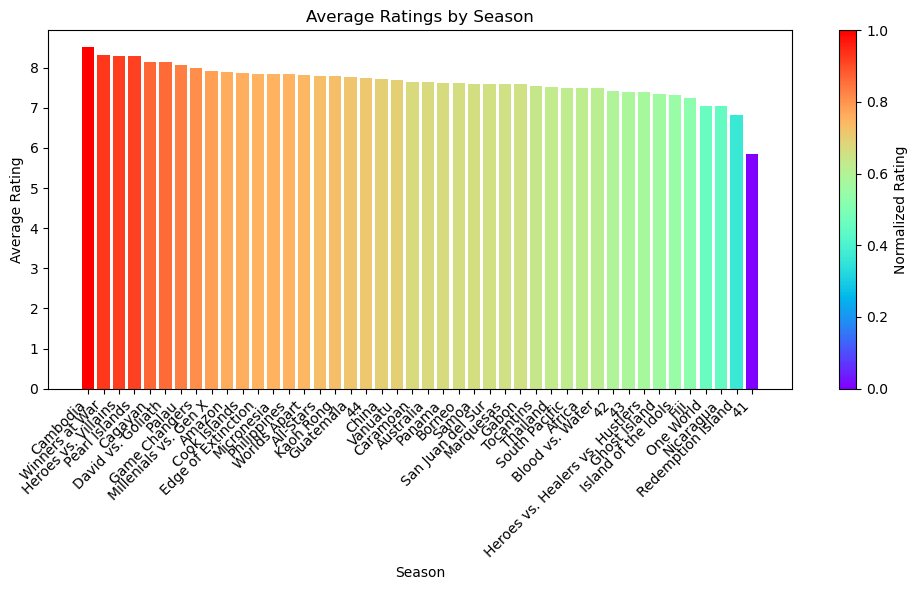

In [53]:
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed

# Set the colormap to 'rainbow'
cmap = plt.get_cmap('rainbow')

# Normalize the ratings values to range from 0 to 1
normalized_ratings = (x['Average Rating'] - x['Average Rating'].min()) / (x['Average Rating'].max() - x['Average Rating'].min())

# Plot the bars with colors from the rainbow colormap
bars = plt.bar(x['Season'].astype(str), x['Average Rating'], color=cmap(normalized_ratings))

plt.xlabel('Season')
plt.ylabel('Average Rating')
plt.title('Average Ratings by Season')

plt.xticks(rotation=45, ha='right')  # Rotate and align the x-axis tick labels

# Create a colorbar legend
sm = plt.cm.ScalarMappable(cmap=cmap)
sm.set_array([])
cbar = plt.colorbar(sm)
cbar.set_label('Normalized Rating')

plt.tight_layout()  # Adjust the layout if needed
plt.show()


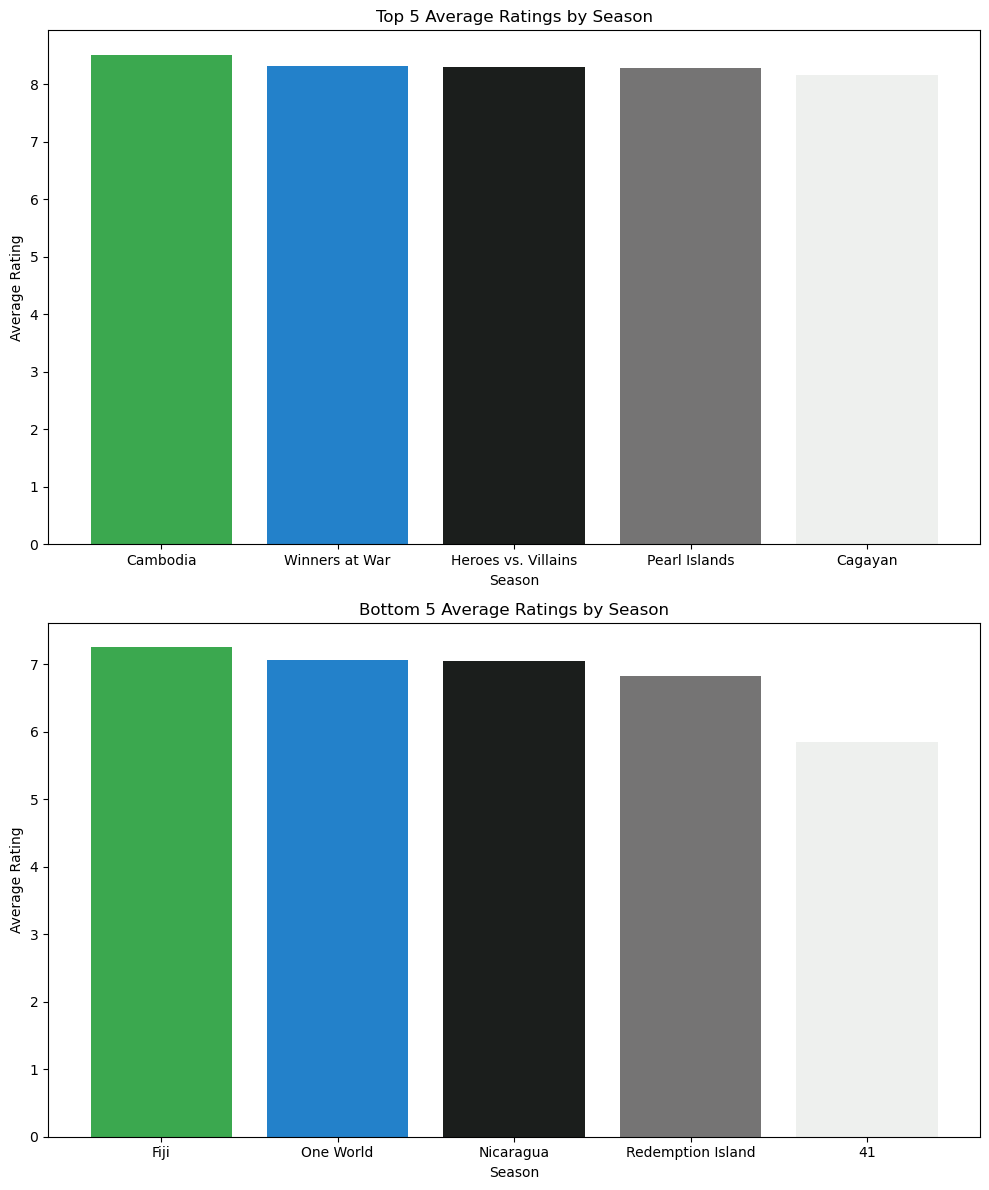

In [54]:
sorted_df = x.sort_values(by='Average Rating', ascending=False)

top_5 = sorted_df.head(5)
bottom_5 = sorted_df.tail(5)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12))

bars1 = ax1.bar(top_5['Season'].astype(str), top_5['Average Rating'], color=colors)
ax1.set_xlabel('Season')
ax1.set_ylabel('Average Rating')
ax1.set_title('Top 5 Average Ratings by Season')

bars2 = ax2.bar(bottom_5['Season'].astype(str), bottom_5['Average Rating'], color=colors)
ax2.set_xlabel('Season')
ax2.set_ylabel('Average Rating')
ax2.set_title('Bottom 5 Average Ratings by Season')

plt.tight_layout() 
plt.show()
